# Predictive Maintenance using Sensor DataCode

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To help with model building
from sklearn.linear_model import LogisticRegression,RidgeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
#Libraries for oversampling and undersampling imbalance target data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline



#Libraries to help with regularization models
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


from sklearn.compose import ColumnTransformer


**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

## Loading the dataset

In [ ]:
df_main = pd.read_csv("Train.csv") #Loading training dataset

In [ ]:
df_main_test = pd.read_csv("Test.csv") #Loading Testing dataset

In [ ]:
# copying training data to another variable to avoid any changes to original data
data = df_main.copy()


In [ ]:
data_test = df_main_test.copy( ) #copying testing data to another variable prevent altering the original data

## Data Overview

- Observations
- Sanity checks

###Viewing the first 5 rows  and last 5 rows of the dataset

In [ ]:
data.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
data.tail()

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
19995 -2.071  -1.088 -0.796 -3.012 -2.288  2.807  0.481  0.105 -0.587 -2.899   
19996  2.890   2.483  5.644  0.937 -1.381  0.412 -1.593 -5.762  2.150  0.272   
19997 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
19998 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
19999 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   

         V11    V12   V13    V14    V15     V16    V17    V18    V19    V20  \
19995  8.868  1.717 1.358 -1.777  0.710   4.945 -3.100 -1.199 -1.085 -0.365   
19996 -2.095 -1.526 0.072 -3.540 -2.762 -10.632 -0.495  1.720  3.872 -1.210   
19997 -3.782  2.180 6.112  1.985 -8.330  -1.639 -0.915  5.672 -3.924  2.133   
19998  1.583  3.571 9.227  2.554 -7.039  -0.994 -9.665  1.155  3.877  3.524   
19999 -9.589  3.177 1.055 -1.416 -4.669  -5.405  3.720  2.893  2.329  1.458   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
19995  3.131 -3.948 -3.578 -8.139 -1.937 -1.328 -0.403 -1.735  9.996  6.955   
19996 -8.222  2.121 -5.492  1.452  1.450  3.685  1.077 -0.384 -0.839 -0.748   
19997 -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
19998 -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
19999 -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   

         V31    V32    V33    V34    V35    V36    V37    V38   V39    V40  \
19995 -3.938 -8.274  5.745  0.589 -0.650 -3.043  2.216  0.609 0.178  2.928   
19996 -1.089 -4.159  1.181 -0.742  5.369 -0.693 -1.669  3.660 0.820 -1.987   
19997  0.982  7.112  1.476 -3.954  1.856  5.029  2.083 -6.409 1.477 -0.874   
19998  1.915  0.403  3.164  3.752  8.530  8.451  0.204 -7.130 4.249 -6.112   
19999  4.674  6.621 -1.989 -1.349  3.952  5.450 -0.455 -2.202 1.678 -1.974   

       Target  
19995       1  
19996       0  
19997       0  
19998       0  
19999       0

###Understanding the shape of the data set.

In [ ]:
data.shape

(20000, 41)

- The training dataset has 20,000 rows.

- The training dataset has 41 columns comprising of 40 predictor columns and 1 target column.

###Checking the value count of the target variable in the training set

In [ ]:
data['Target'].value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

- Classes in the target varible are quite imbalanced.

###Check the datatypes of features in the training dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- All datatypes seem to be correct for the data.
- There may be missing values in columns v1 and v2, more investigations will be done.

###Checking for missing values.

In [ ]:
#Checking for missing values
missing_values = data.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
V1    18
V2    18
dtype: int64


- As earlier suspected there are 18 missing values each in the v1 and v2 columns.

###Check for duplicate data.

In [ ]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f'There are {duplicates} duplicates')

There are 0 duplicates


###Statistical summary of training data.

In [ ]:
data.describe(include= 'all').T # Statistical summary of training set.

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

- The standard deviation of the test data all seem not be too large which is good for model performance.

## Exploratory Data Analysis (EDA)

In [ ]:
#Creating a copy of the training dataset for exploratory data analysis
data1 = data.copy()

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data1, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data1[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data1[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

###Univariate analysis

#### Plotting all the features at one go

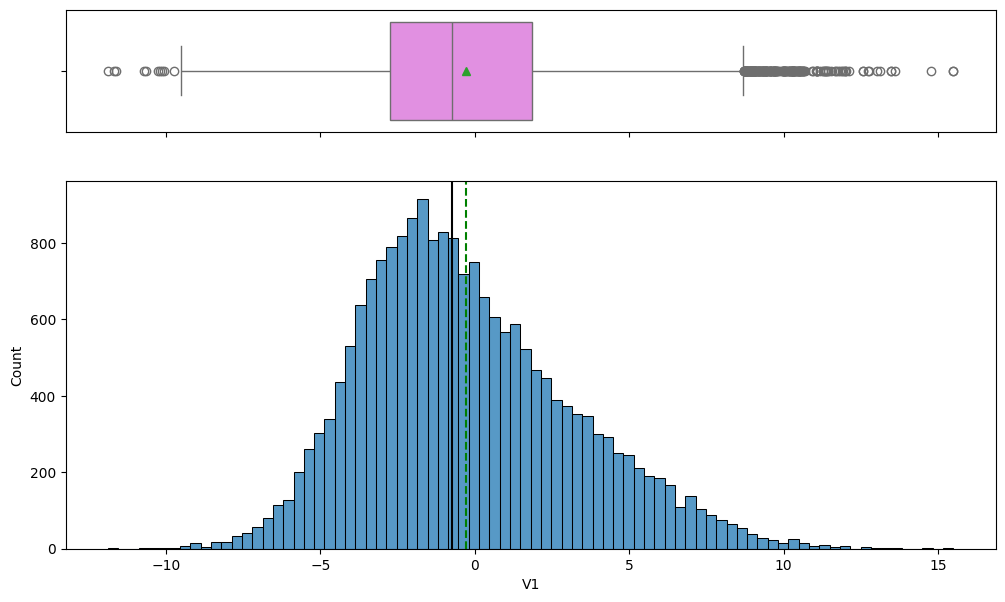

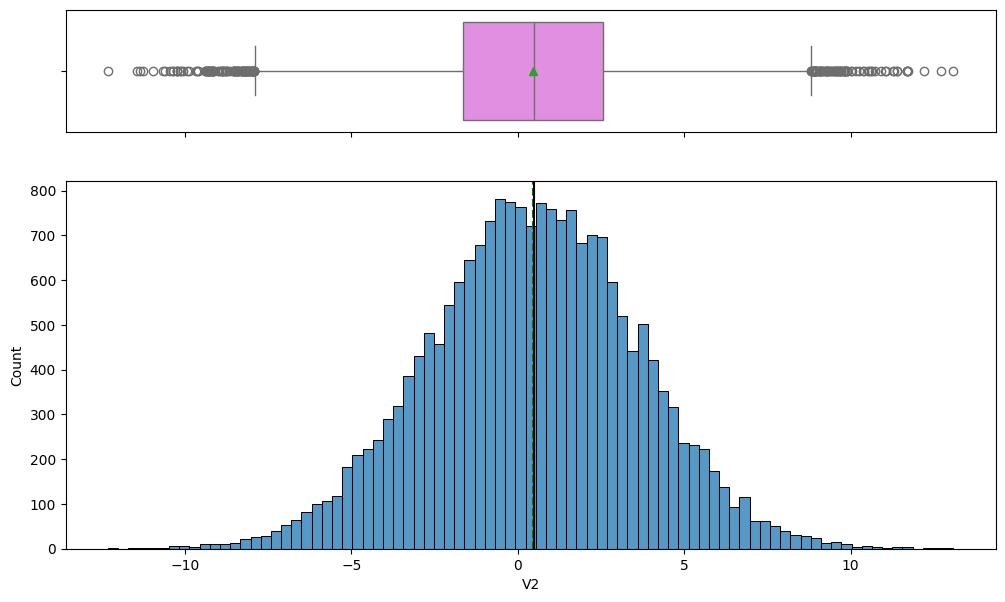

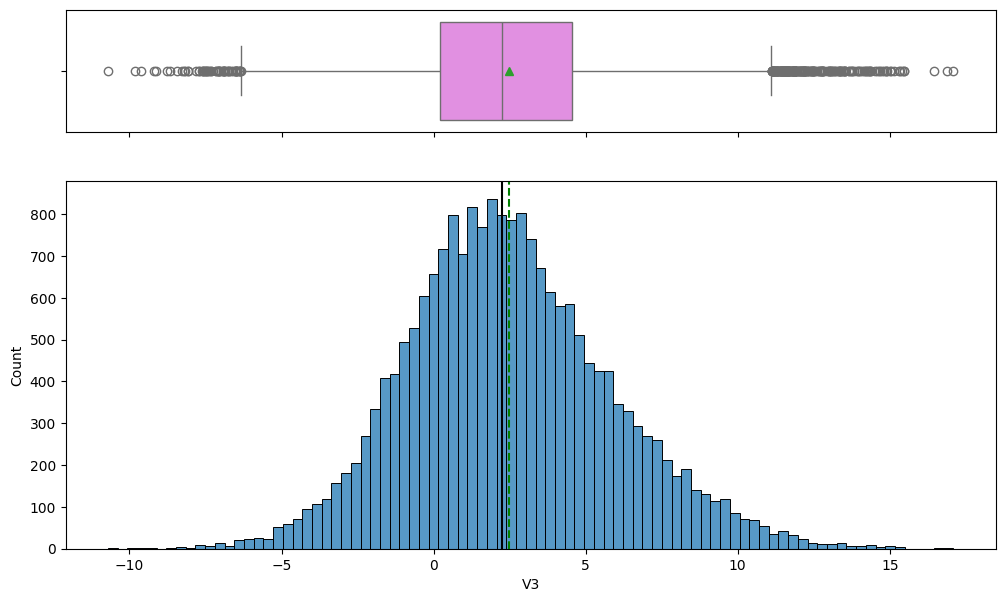

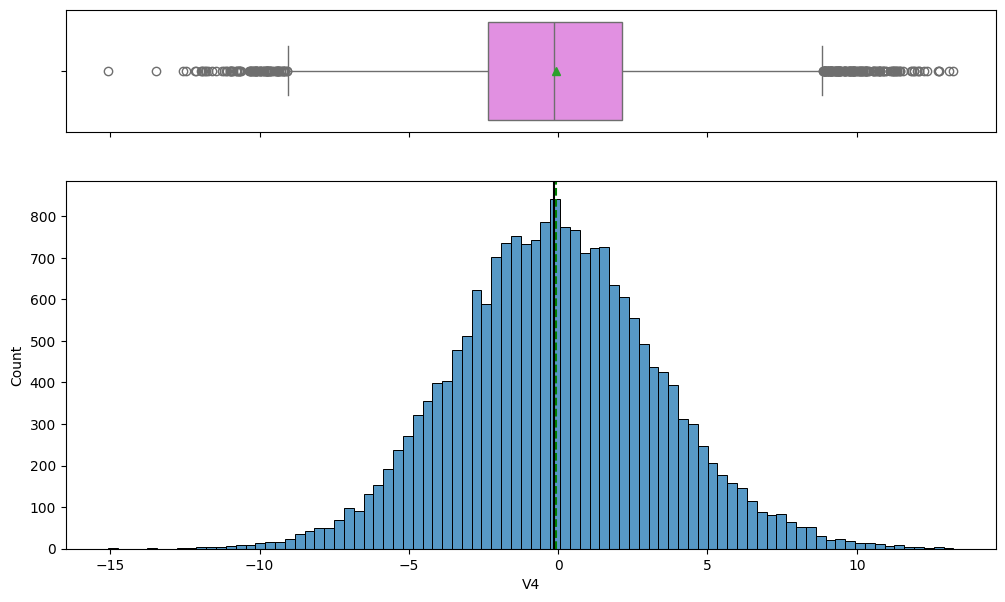

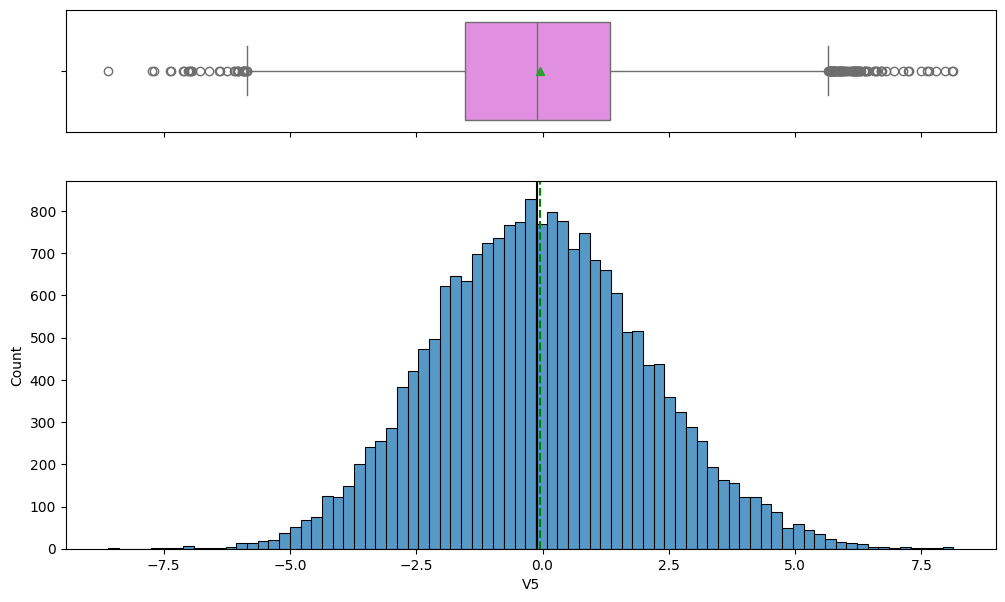

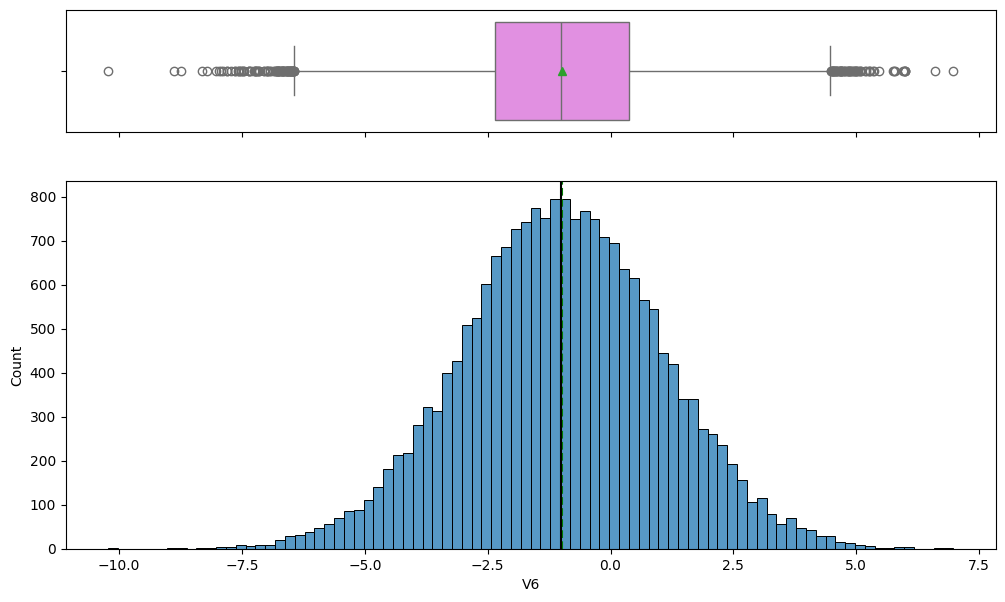

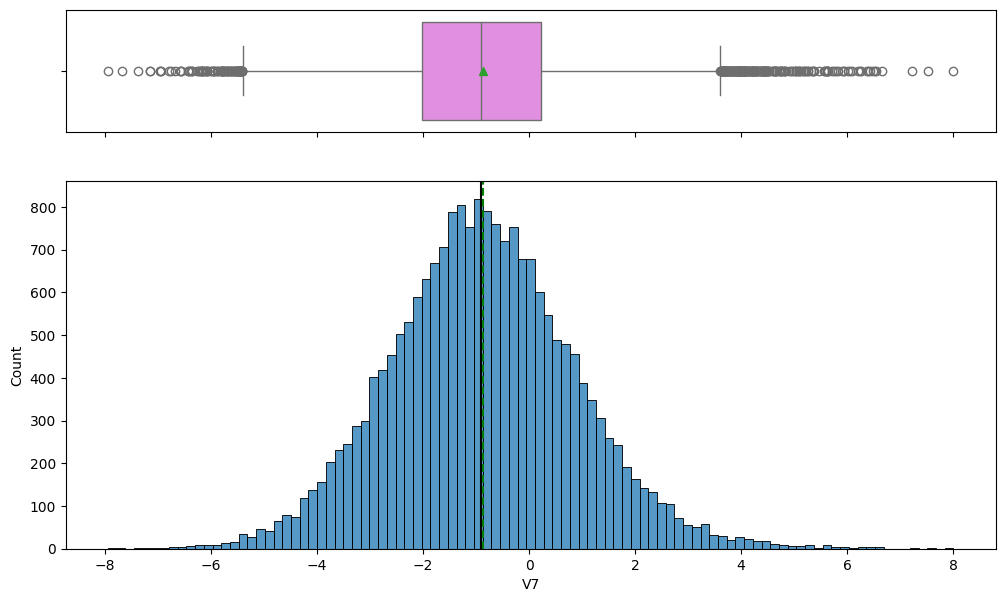

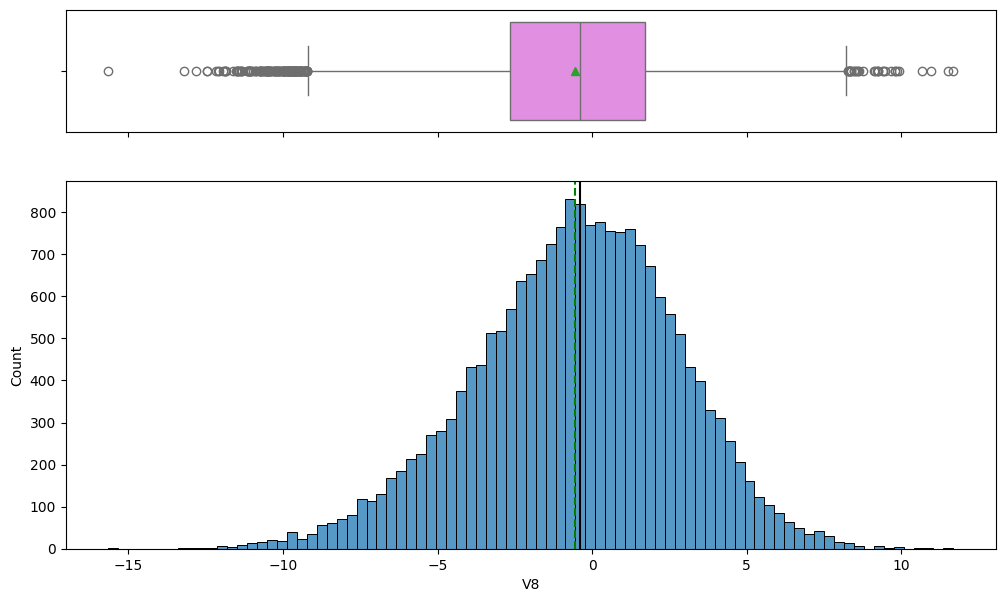

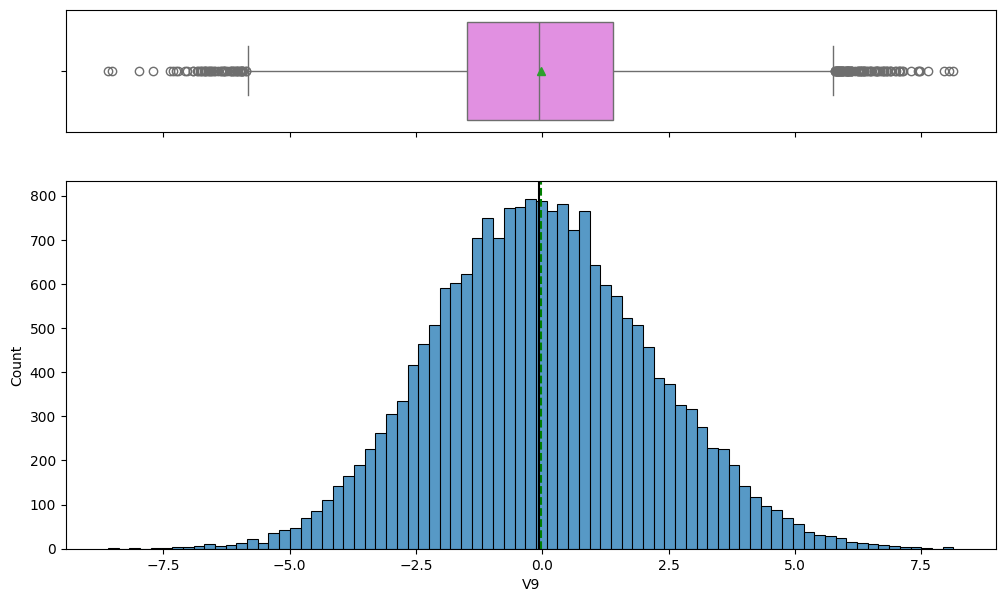

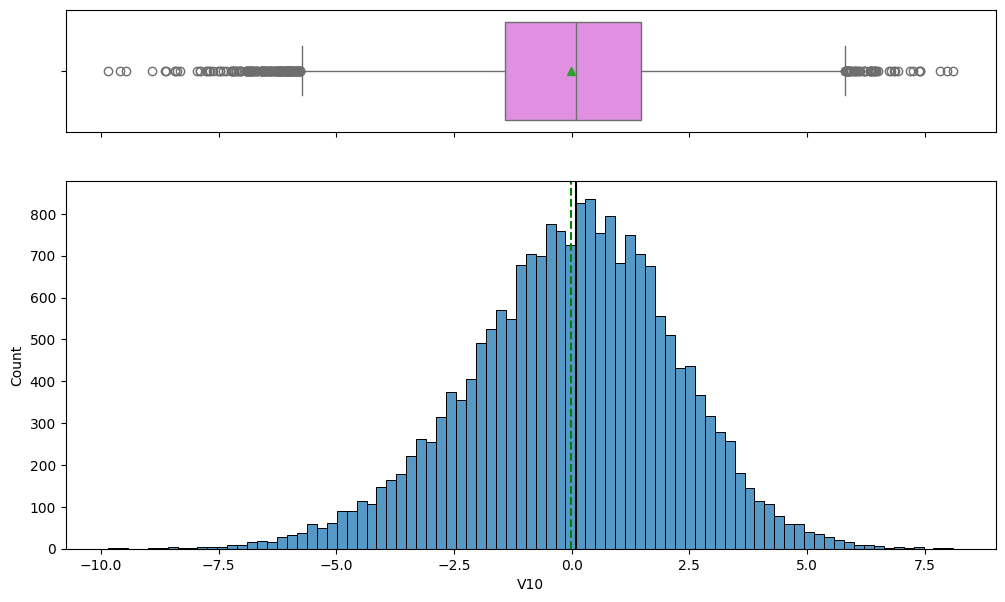

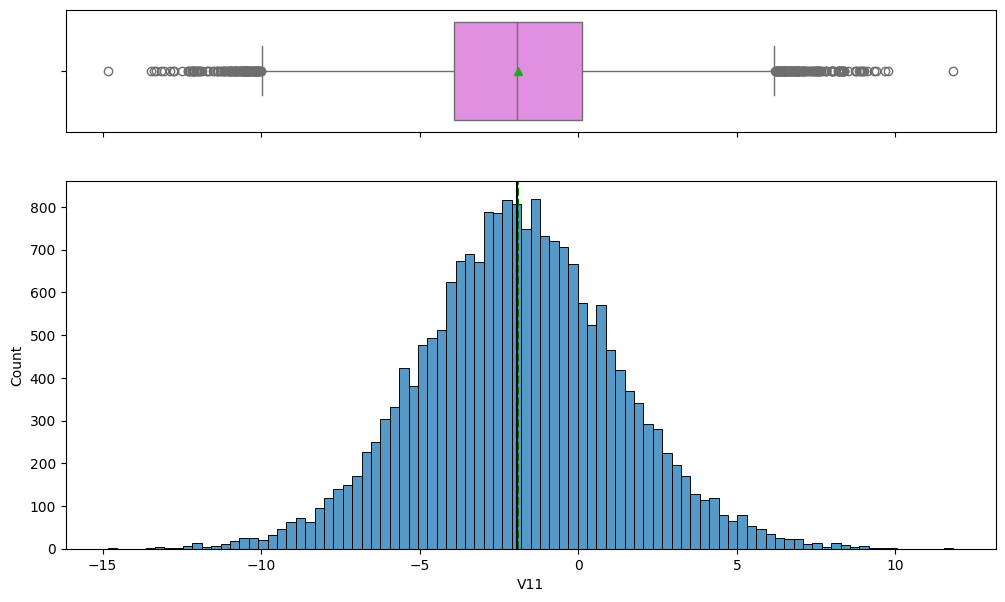

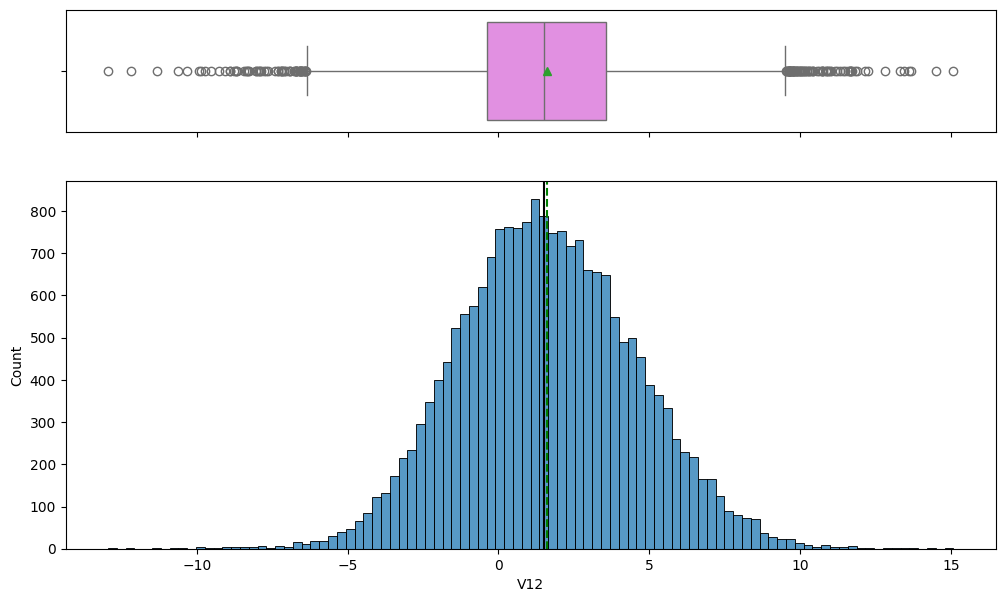

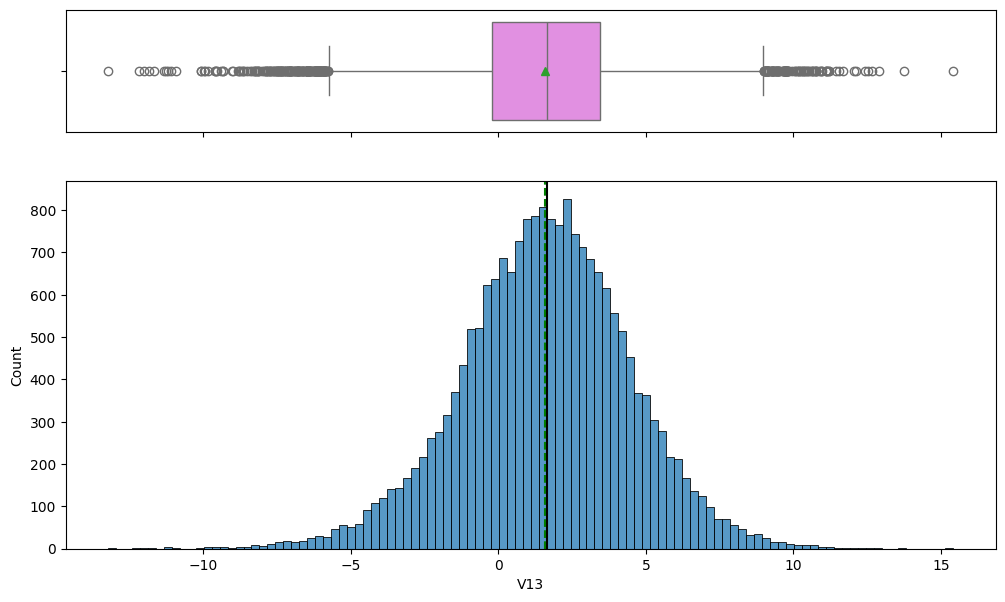

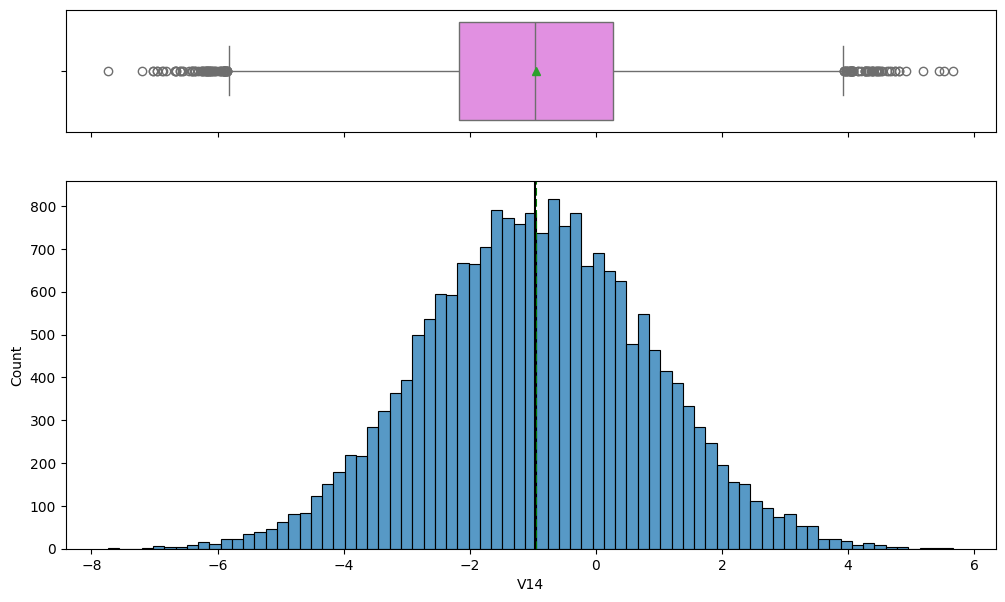

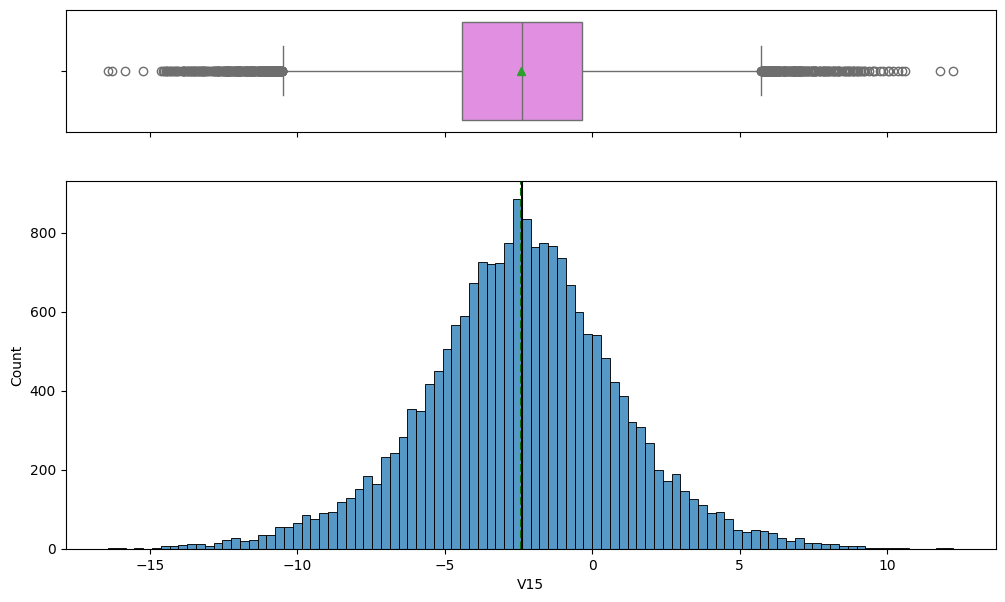

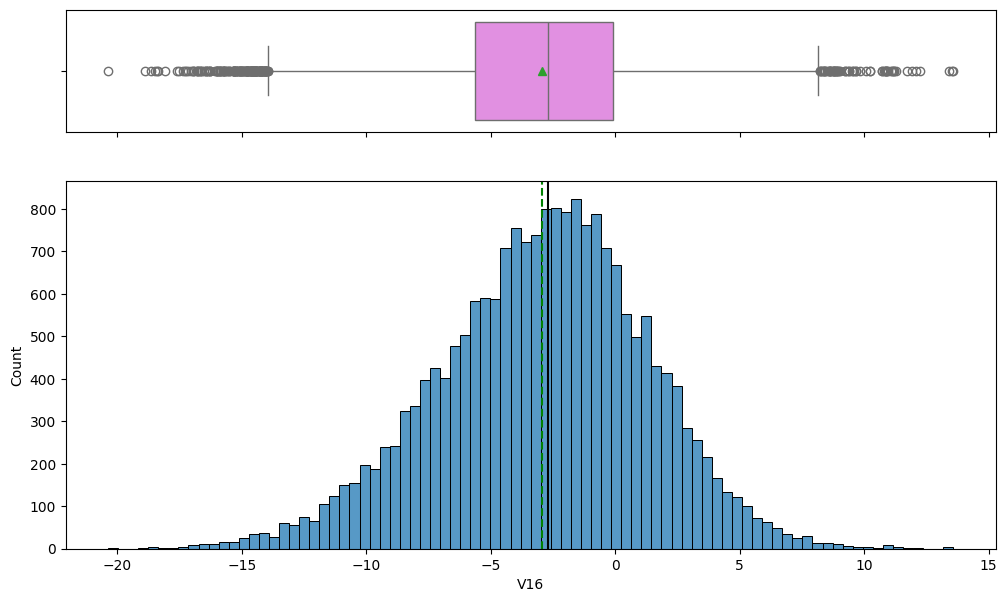

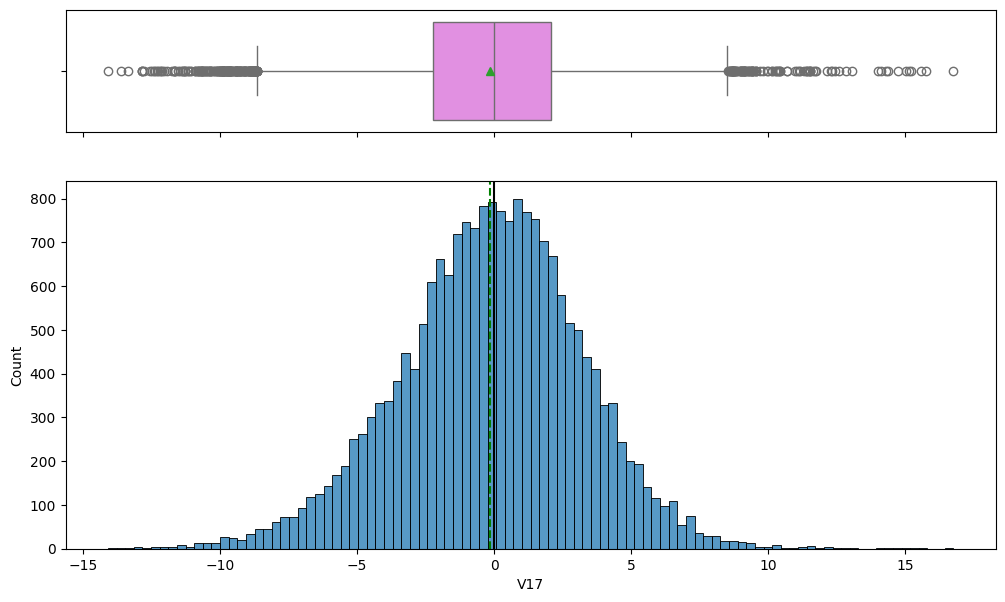

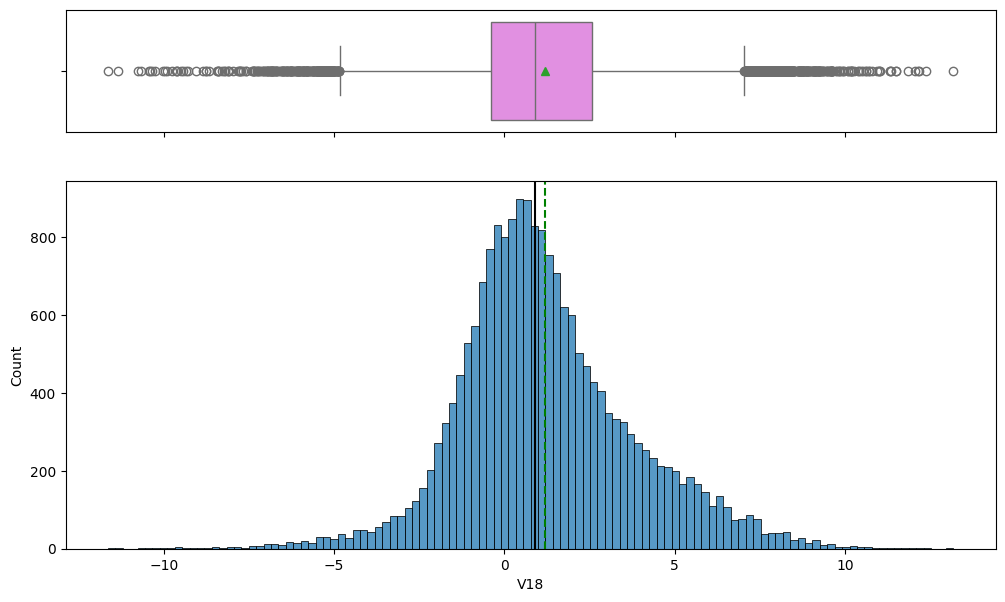

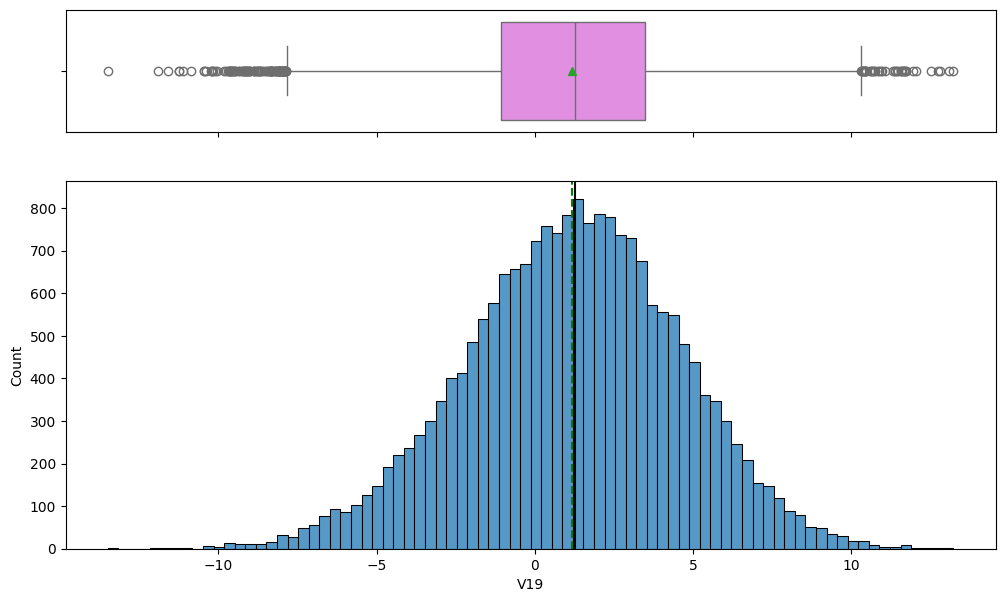

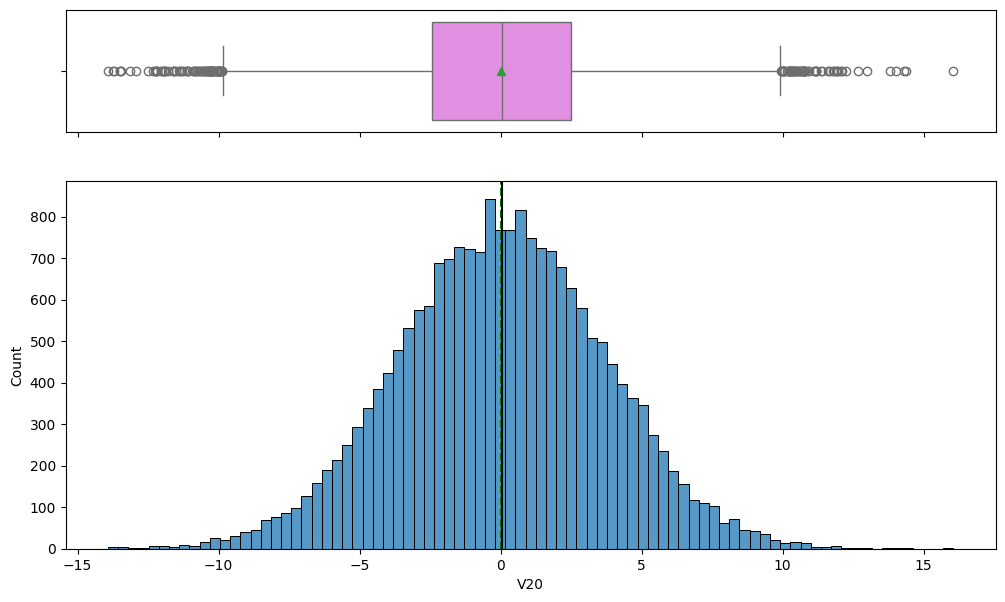

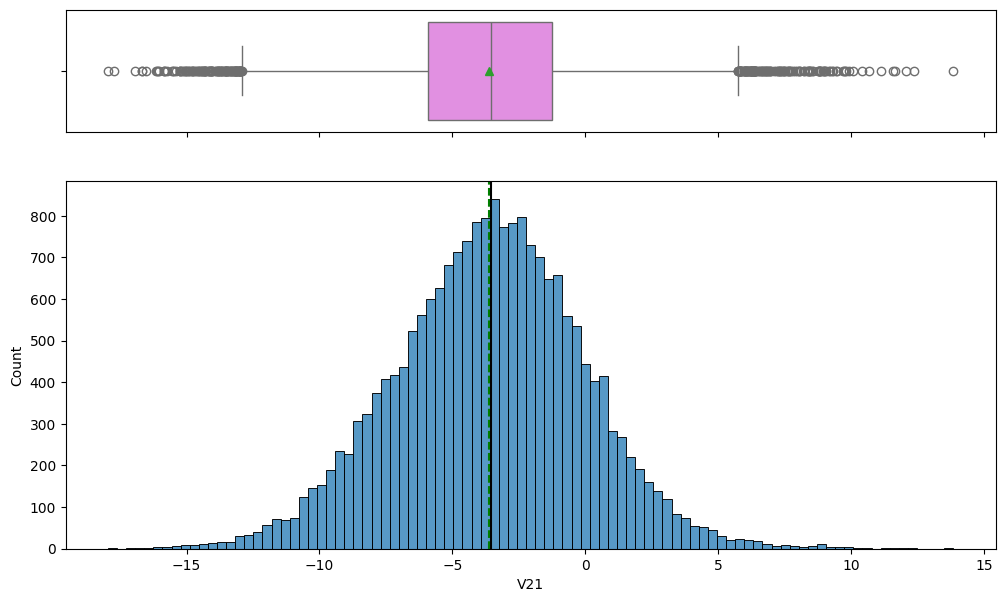

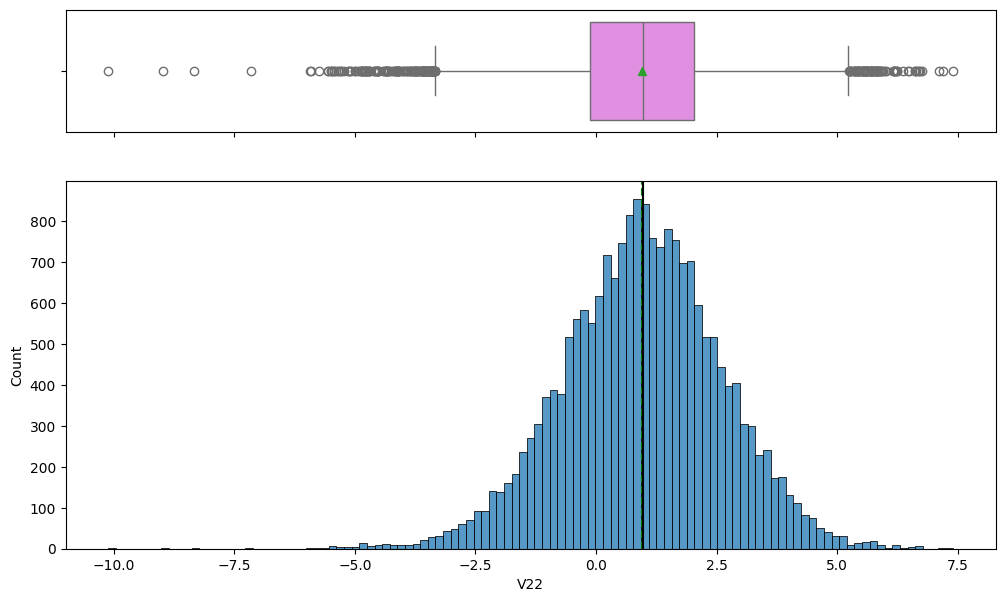

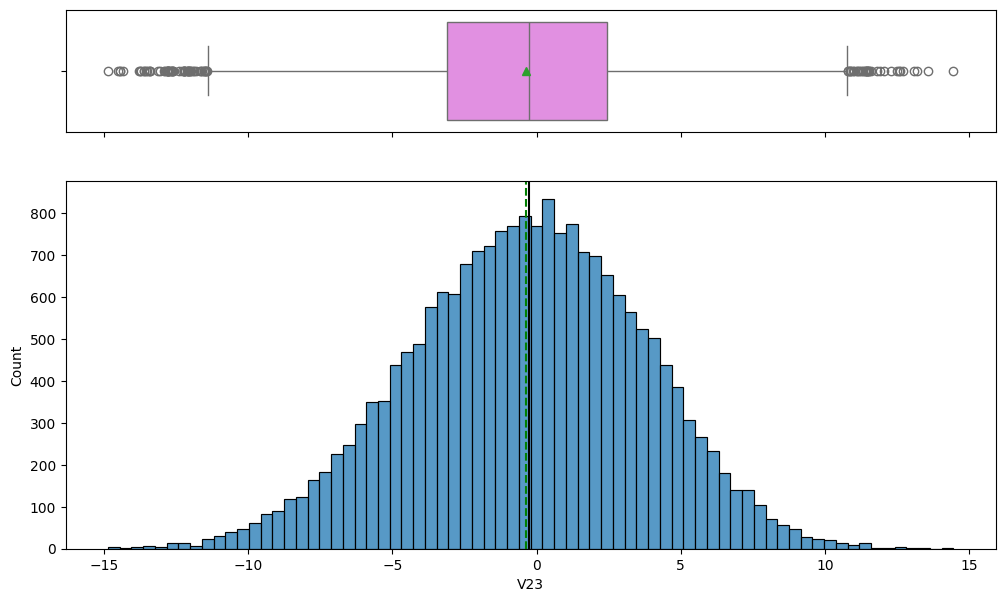

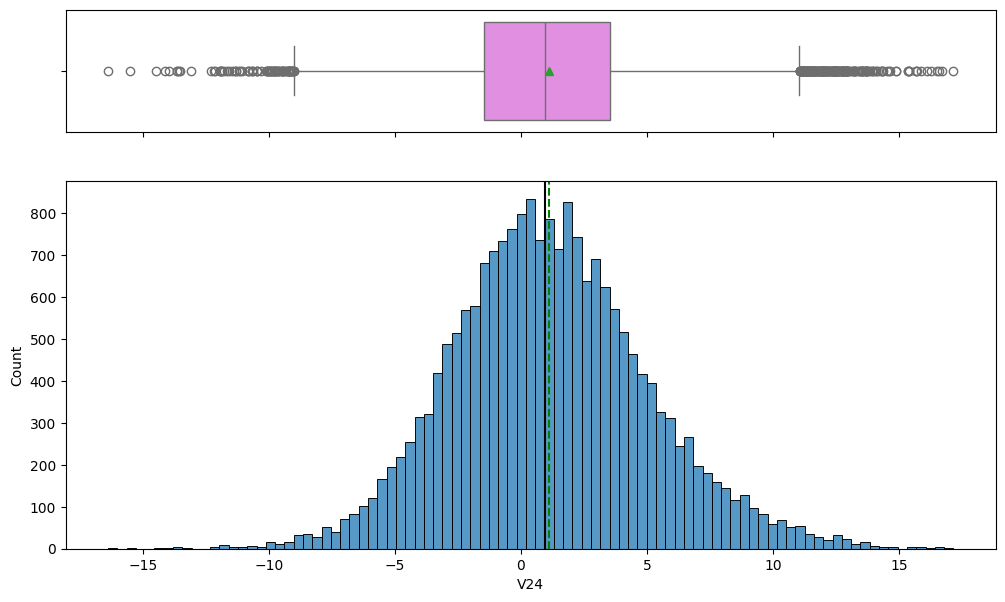

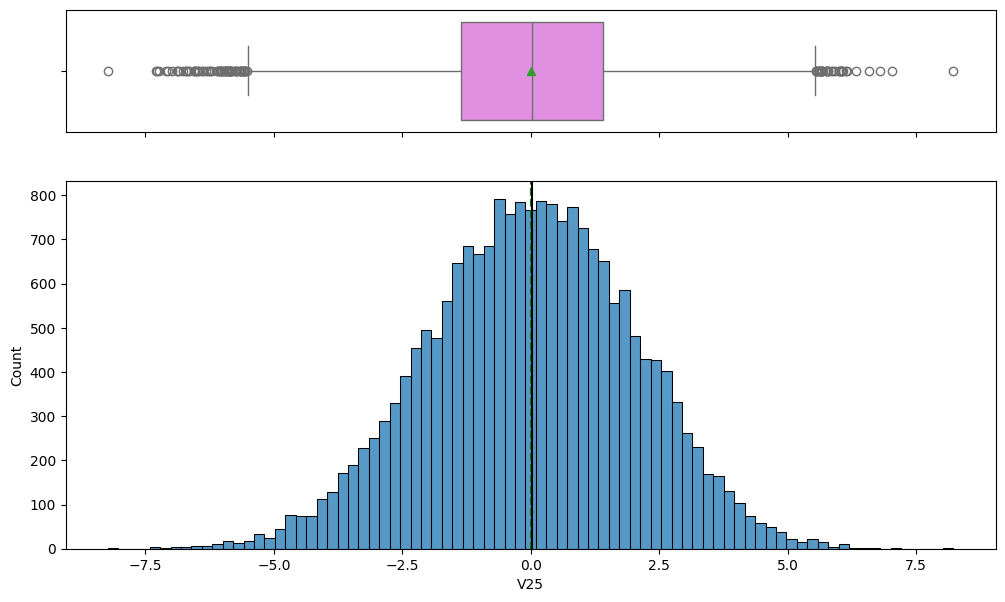

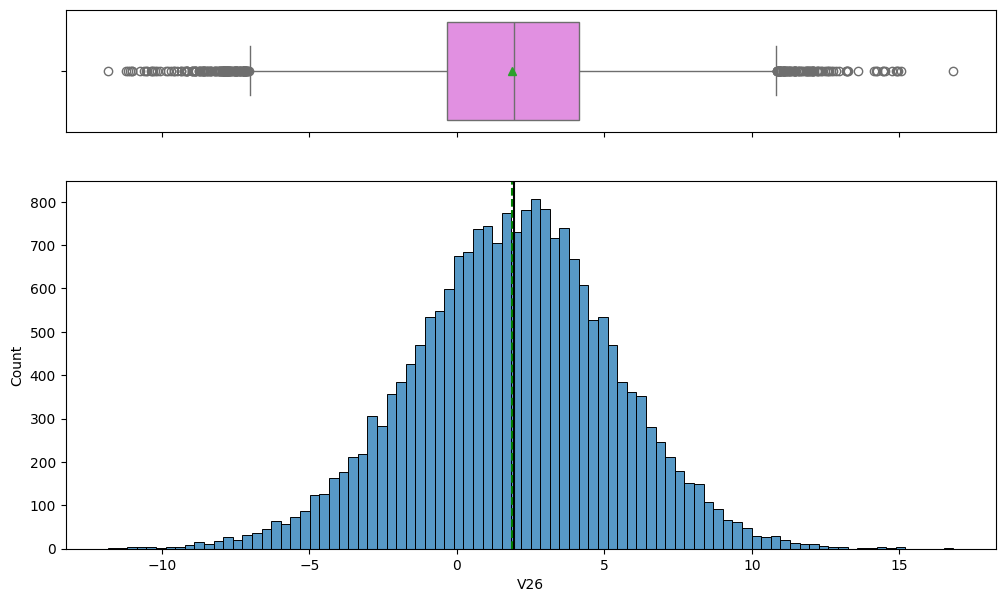

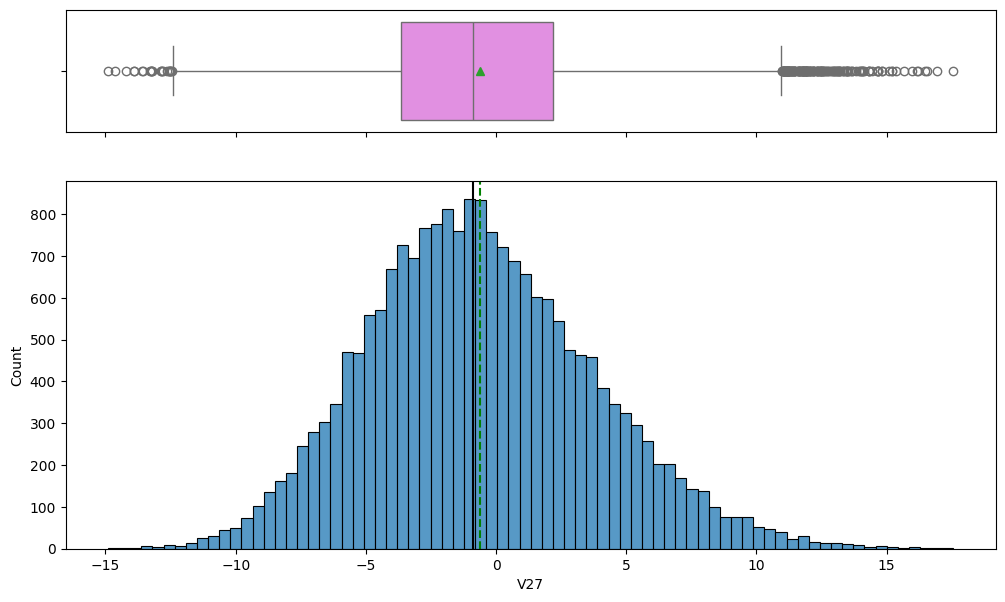

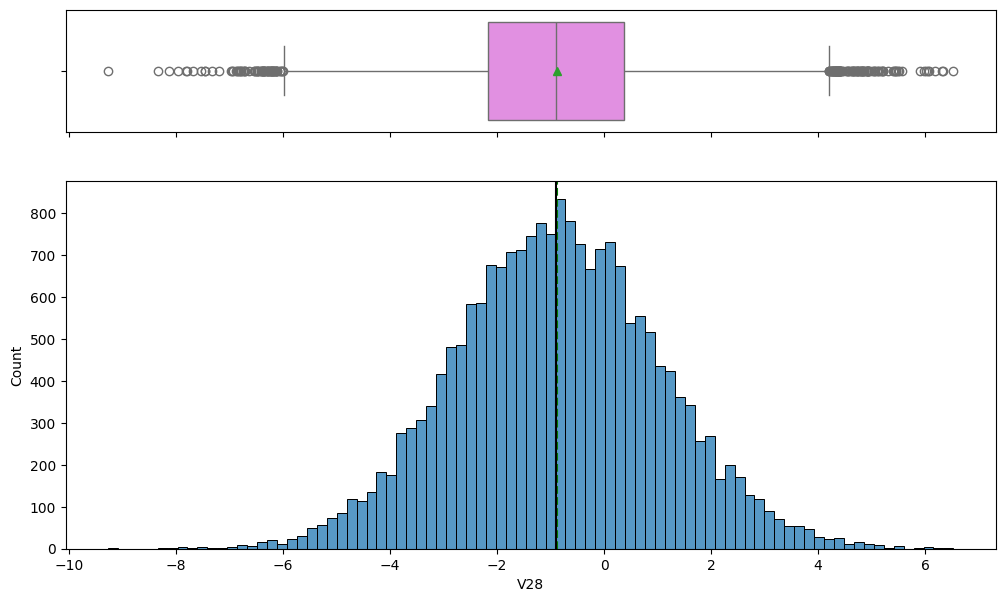

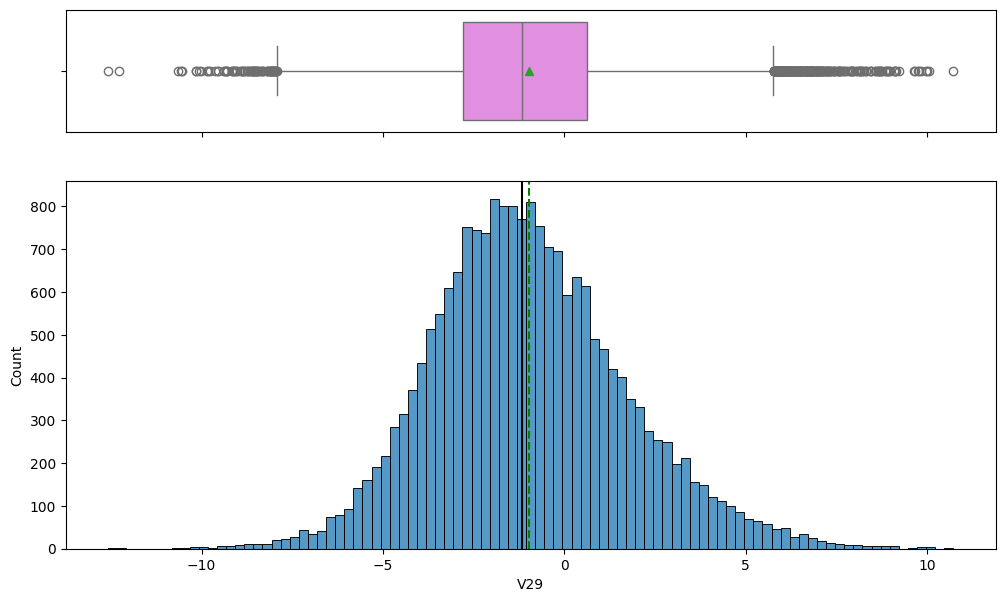

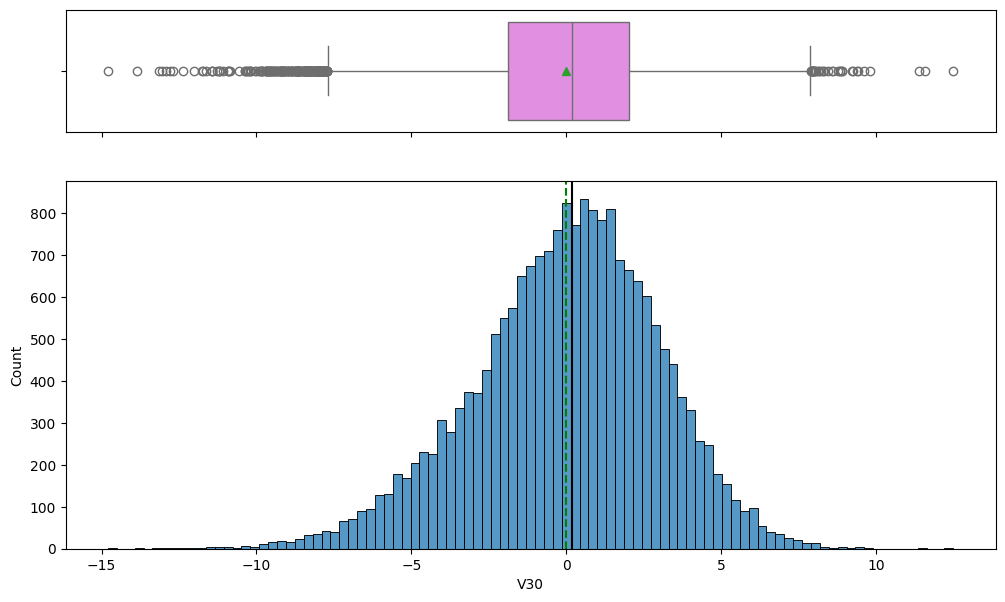

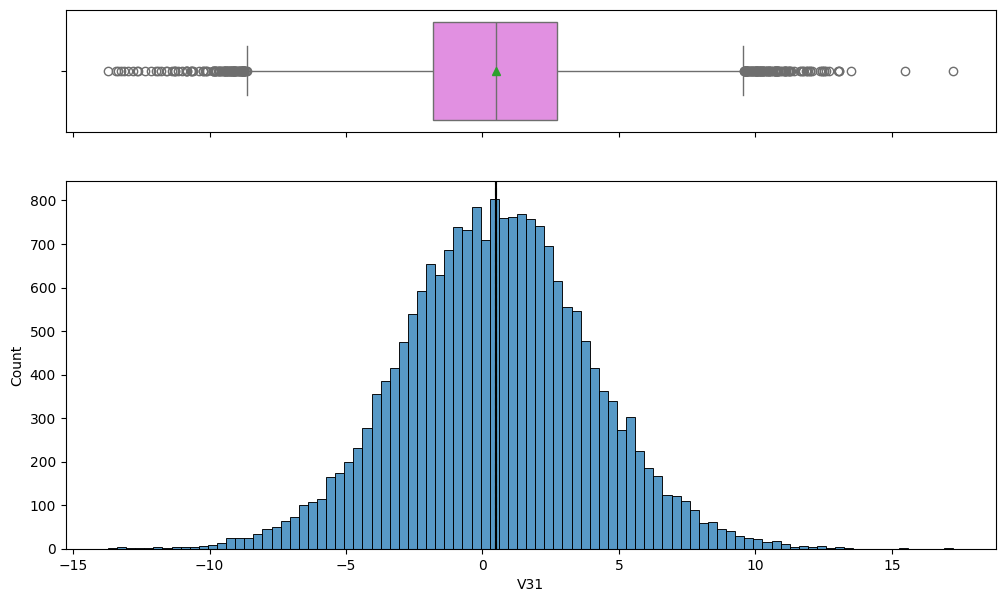

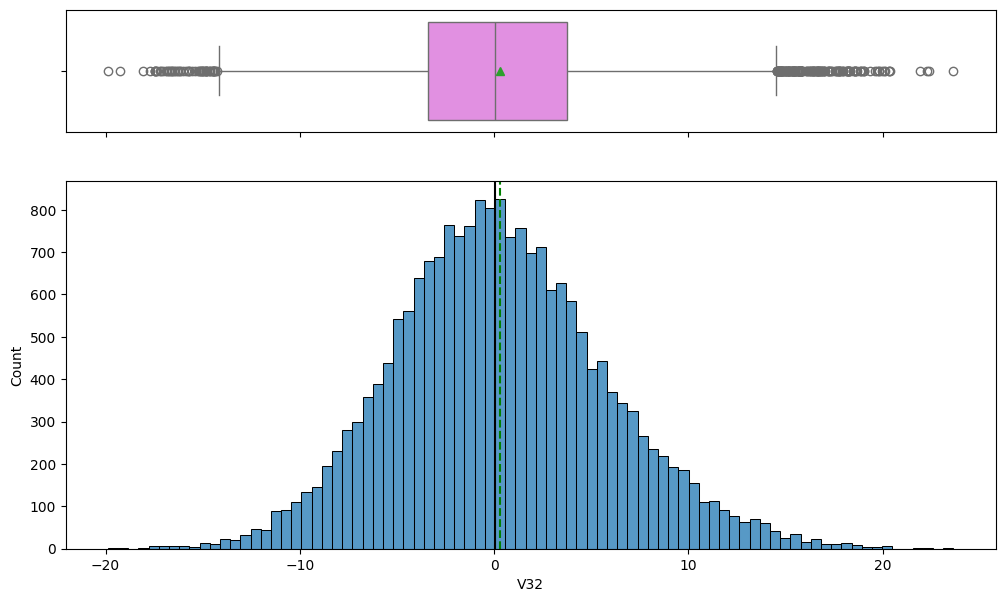

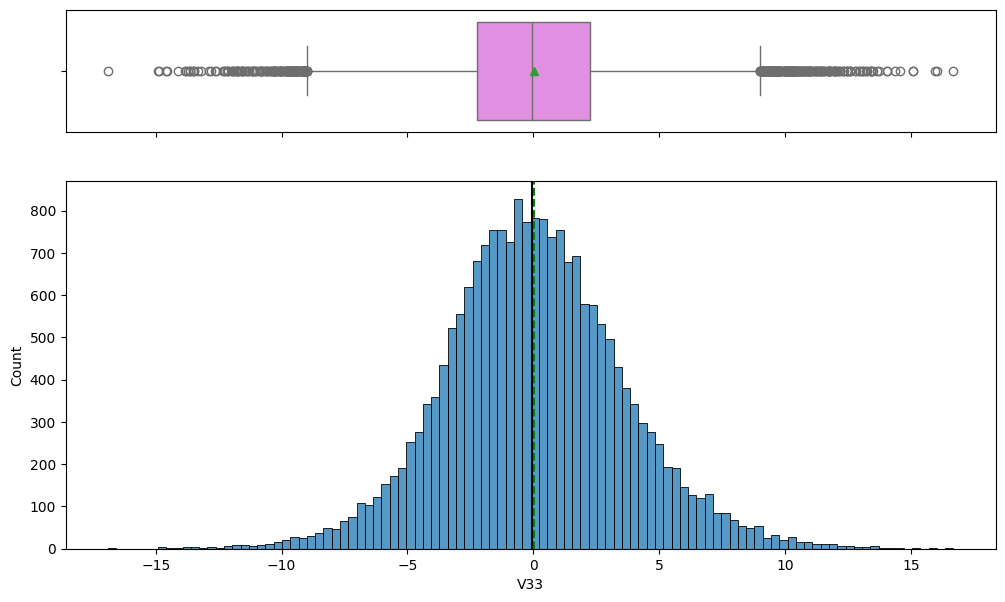

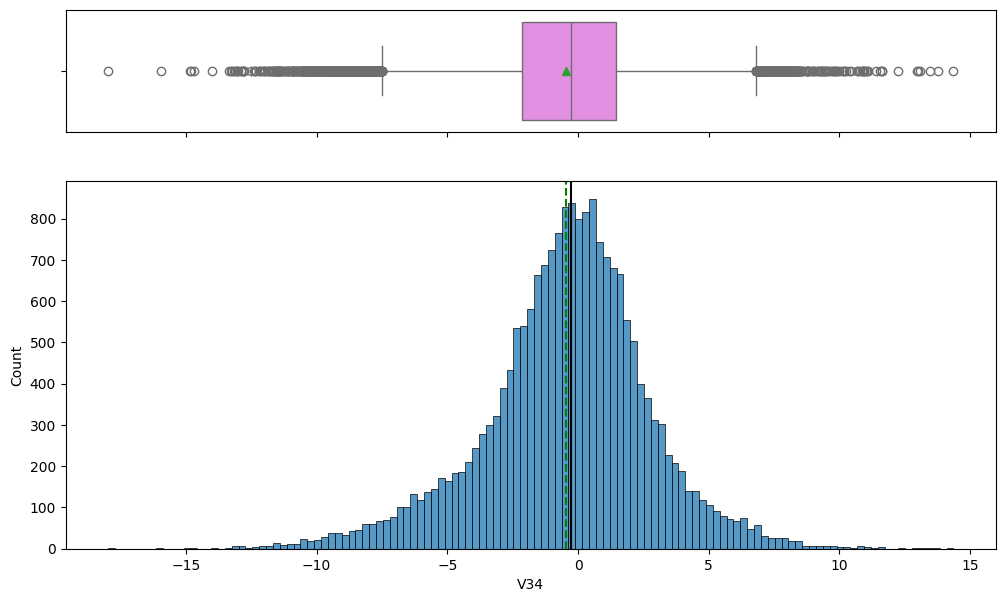

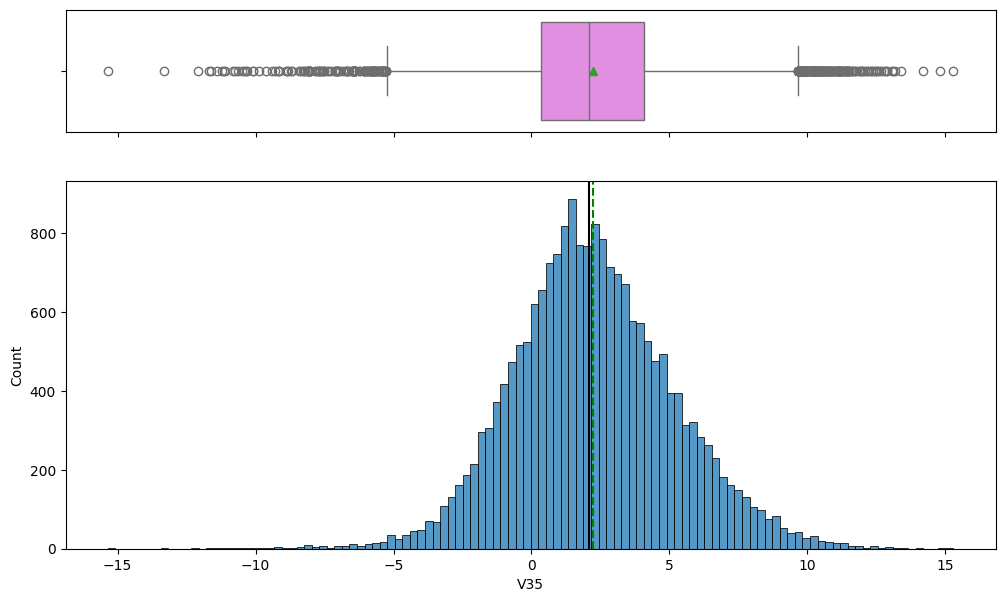

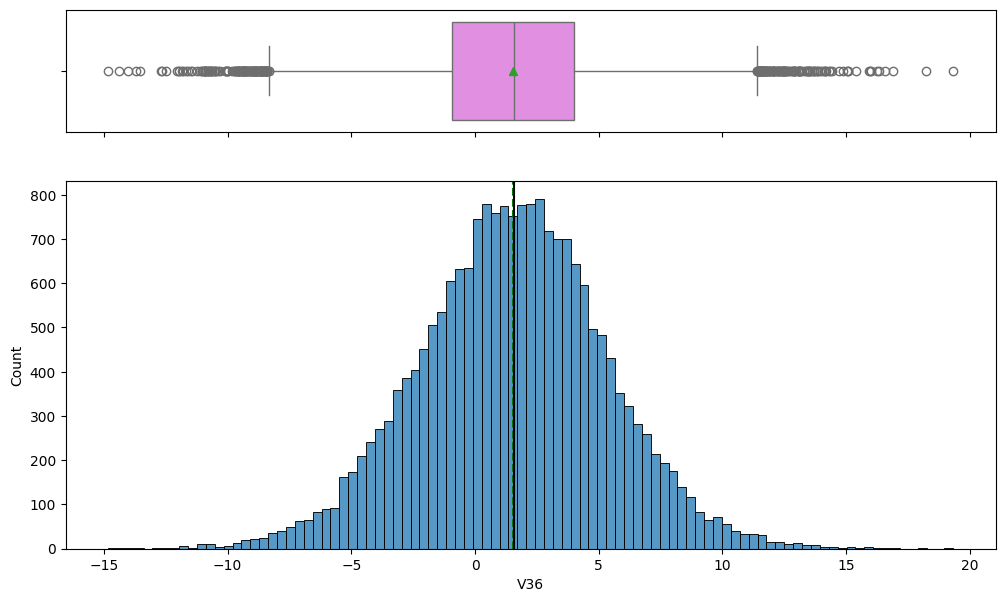

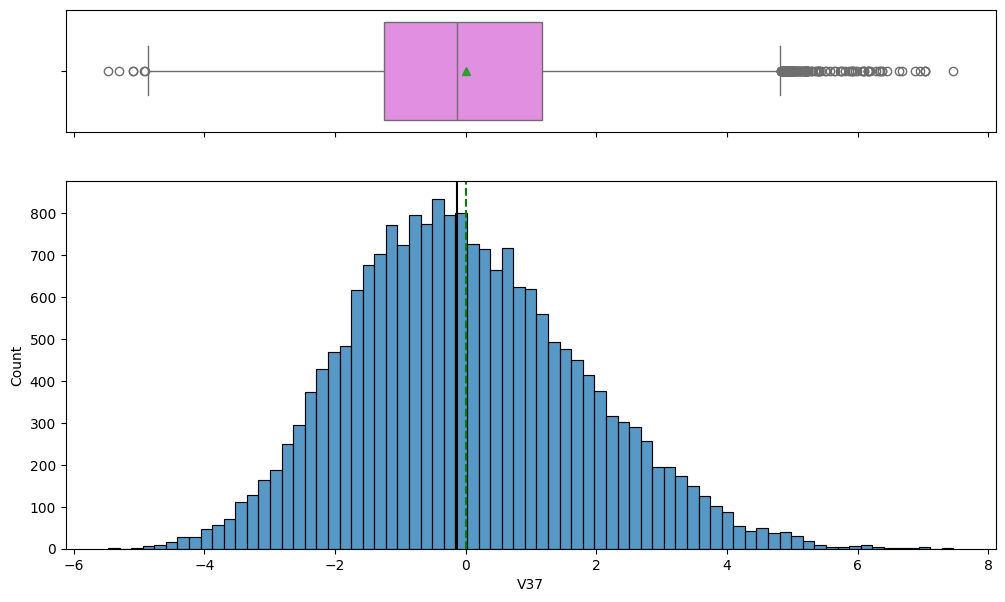

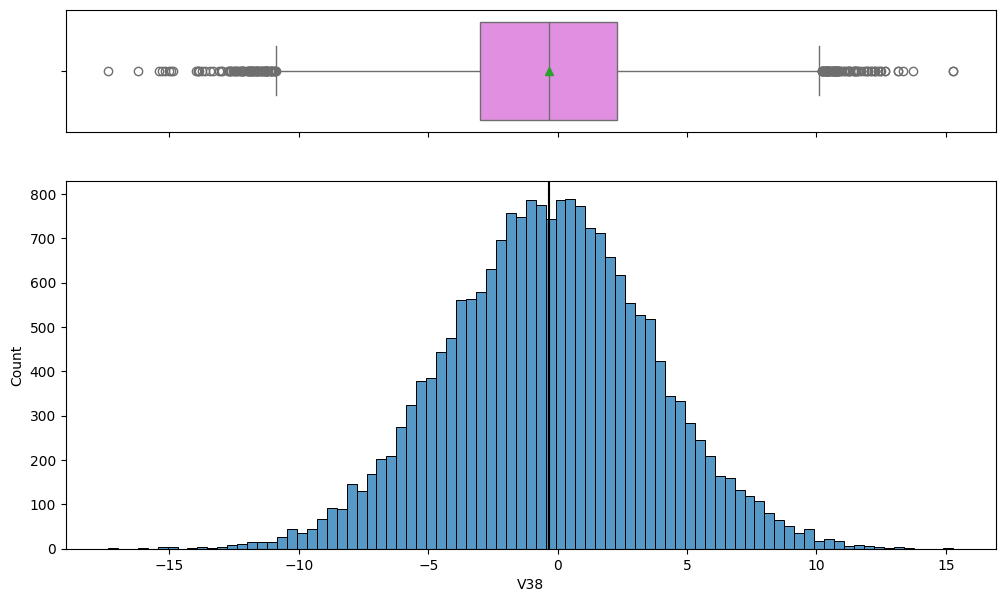

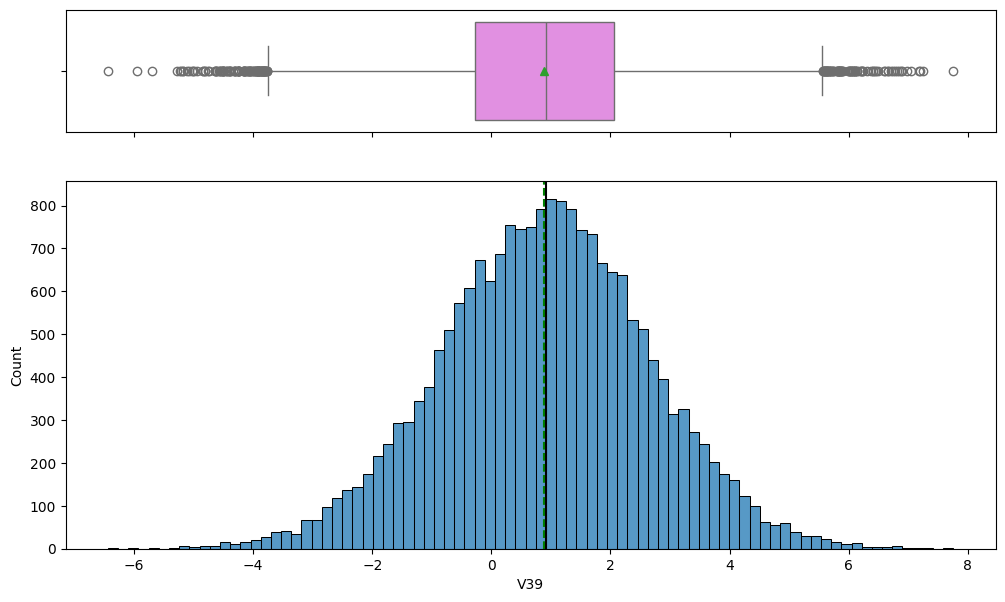

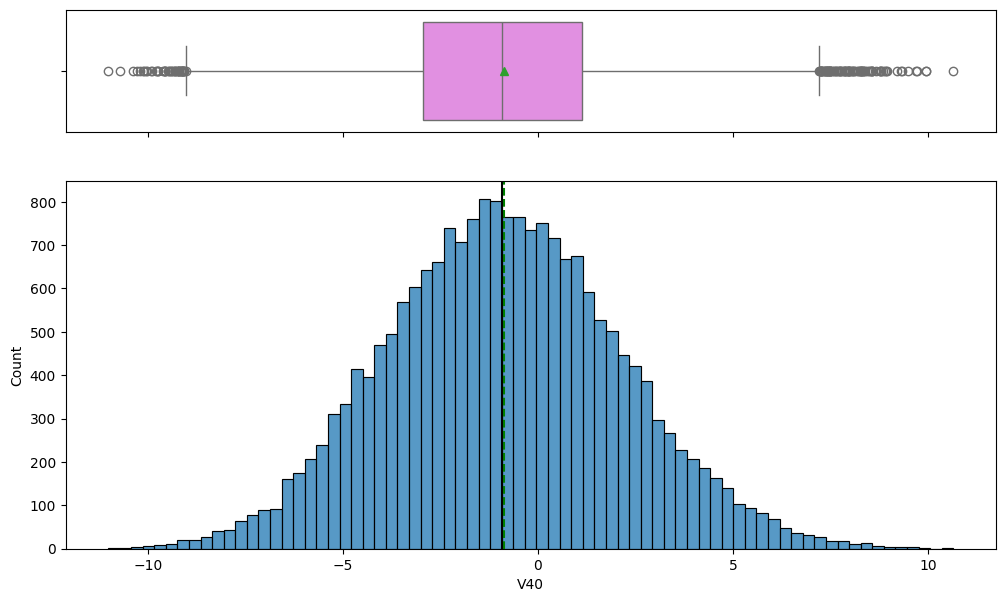

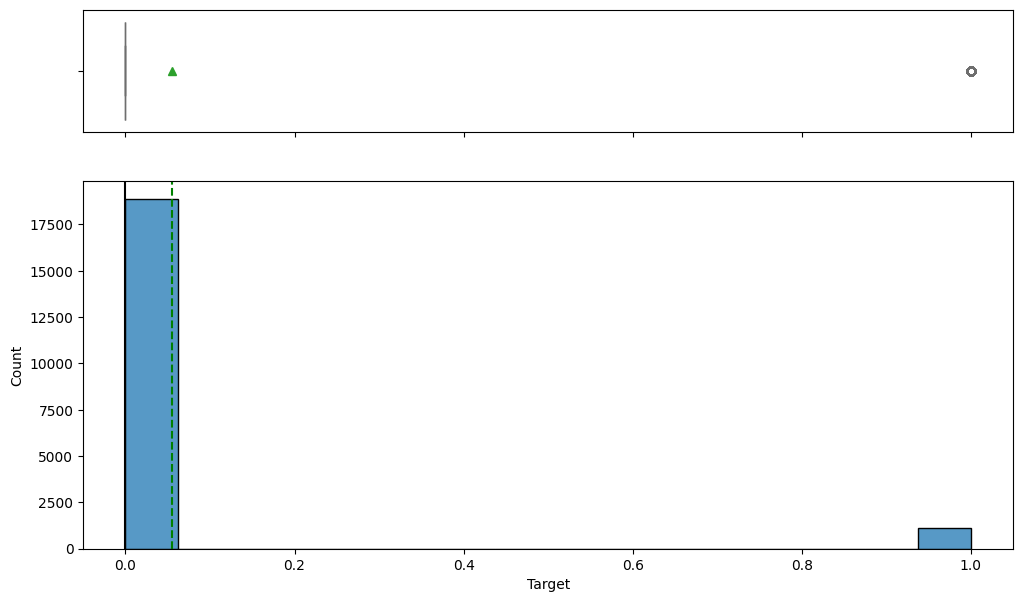

In [ ]:
for feature in data1.columns:
    histogram_boxplot(data1, feature, figsize=(12, 7), kde=False, bins=None)

- All the predictor features are almost normally distributed with small to moderate number of outliers
- The target variable is highly imbalanced with almost 90% of the target variable belonging to class 0.

### Bivariate analysis

####Create a correlation heatmap

In [ ]:
# creating a list of numerical columns
num_cols = data1.select_dtypes(include=np.number).columns.tolist()

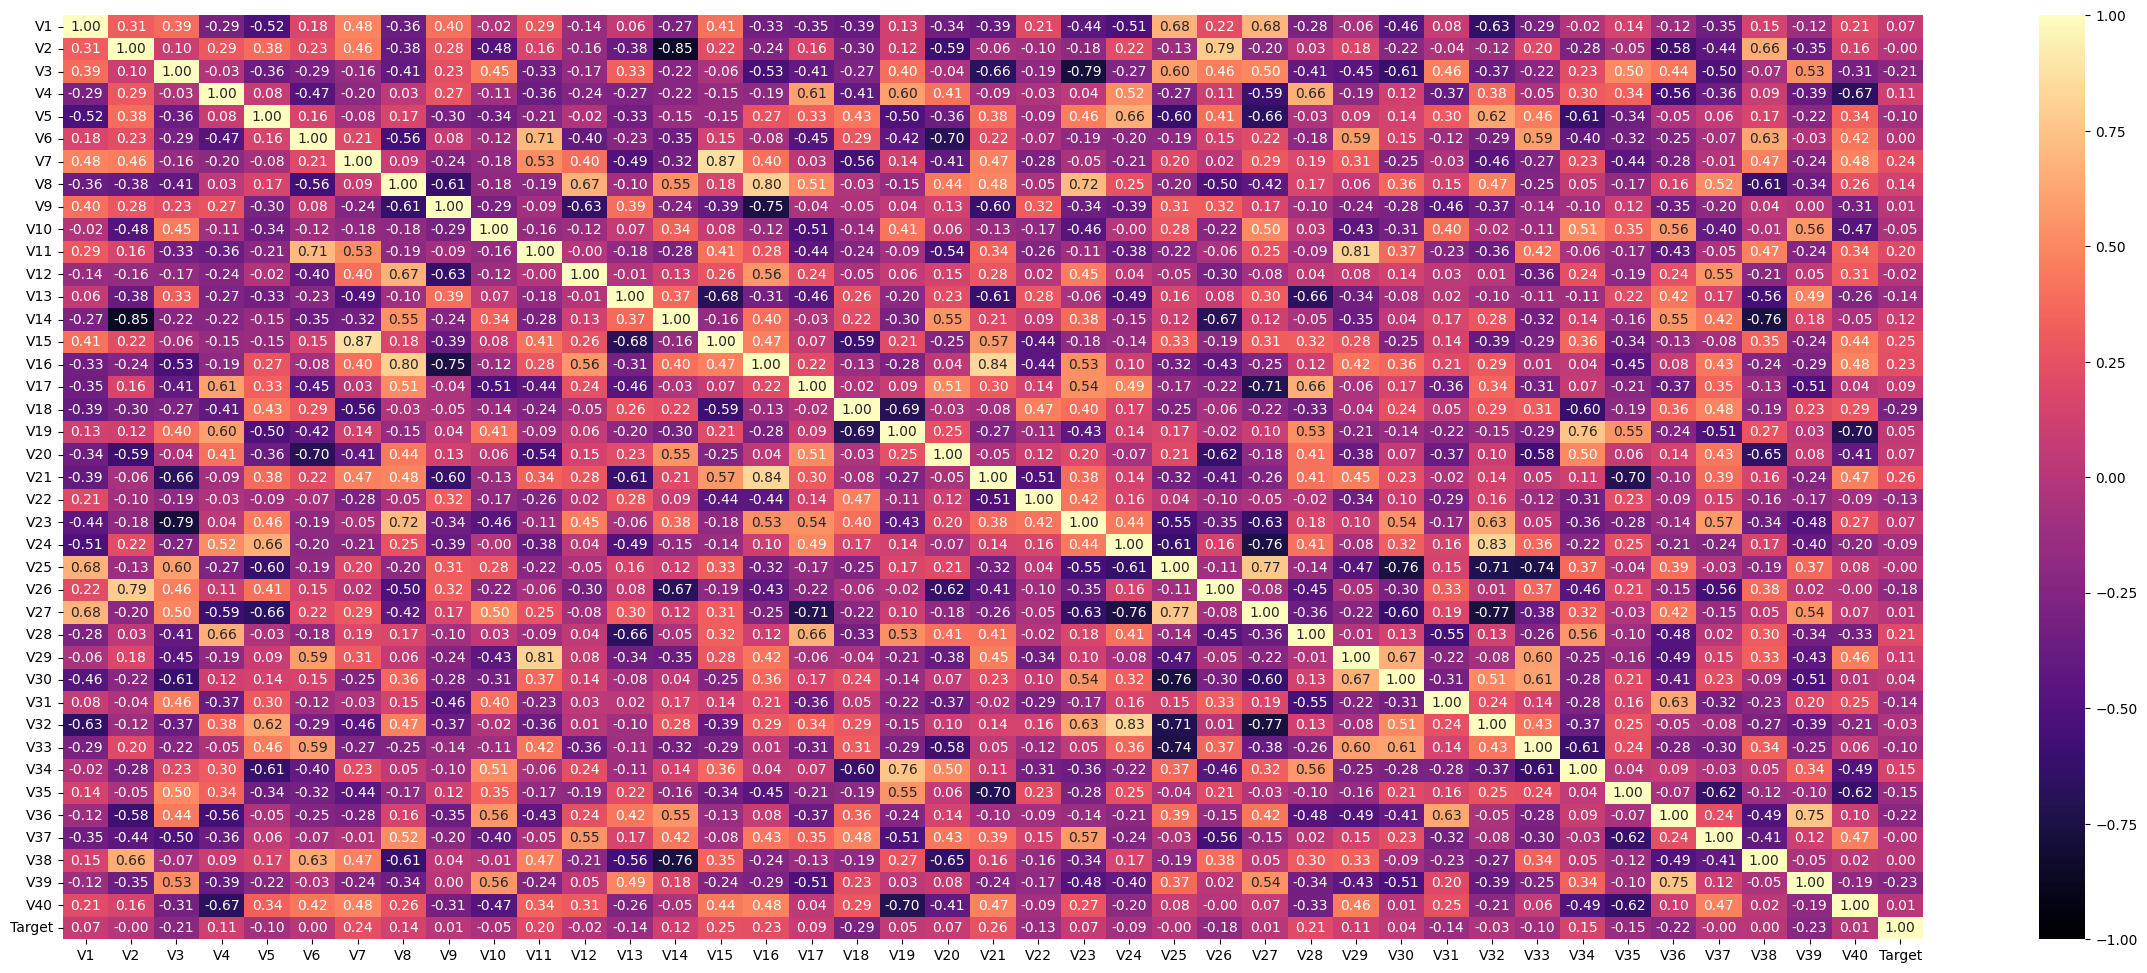

In [ ]:
#plotting correlation heat map
plt.figure(figsize=(30, 12))
sns.heatmap(
    data1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="magma")

plt.show()

- Columns v14 and v2 have the strongest correlations in the data set.
- There a couple of columns with weak correlation with Target coulumn, but none with strong or moderately strong correlations with the target feature.
- The top three columns with the strongest negative correlation with the Target feature are; v18, v39 an v3.
- The top 3 columns with the strongest positive correllation with the target columns include; v28, v15, and v7.

####Ploting a pairplot to compare features.

- I will now visualize the relationship between these features with significant relationship to the target feature using a pair plot.

In [ ]:
data1_pairplot = data1.copy()

In [ ]:
data1_pairplot.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'Target'],
      dtype='object')

In [ ]:
# Define the bins and labels
bins = [-float("inf"), 0.5, float("inf")]  # Define bins to cover all possible values
labels = ['no_failure', 'failure']  # Define labels corresponding to each bin

# Assign labels to numerical variables in the column
data1_pairplot['Target_Category'] = pd.cut(data['Target'], bins=bins, labels=labels)


In [ ]:
data1_pairplot['Target_Category'].unique()

['no_failure', 'failure', NaN]
Categories (2, object): ['no_failure' < 'failure']

In [ ]:
# Check if the 'Target_Category' column is created successfully
print(data1_pairplot['Target_Category'])

0        no_failure
1        no_failure
2        no_failure
3        no_failure
4        no_failure
            ...    
14713    no_failure
14714    no_failure
14715    no_failure
14716    no_failure
14717           NaN
Name: Target_Category, Length: 14718, dtype: category
Categories (2, object): ['no_failure' < 'failure']


In [ ]:
# Select specific columns you want to include in the pairplot along with the Target_Category column
columns_to_include = ['V18', 'V39', 'V3', 'V28', 'V15','V7','V36','V26']
new_data = data1_pairplot[columns_to_include + ['Target_Category']].copy()

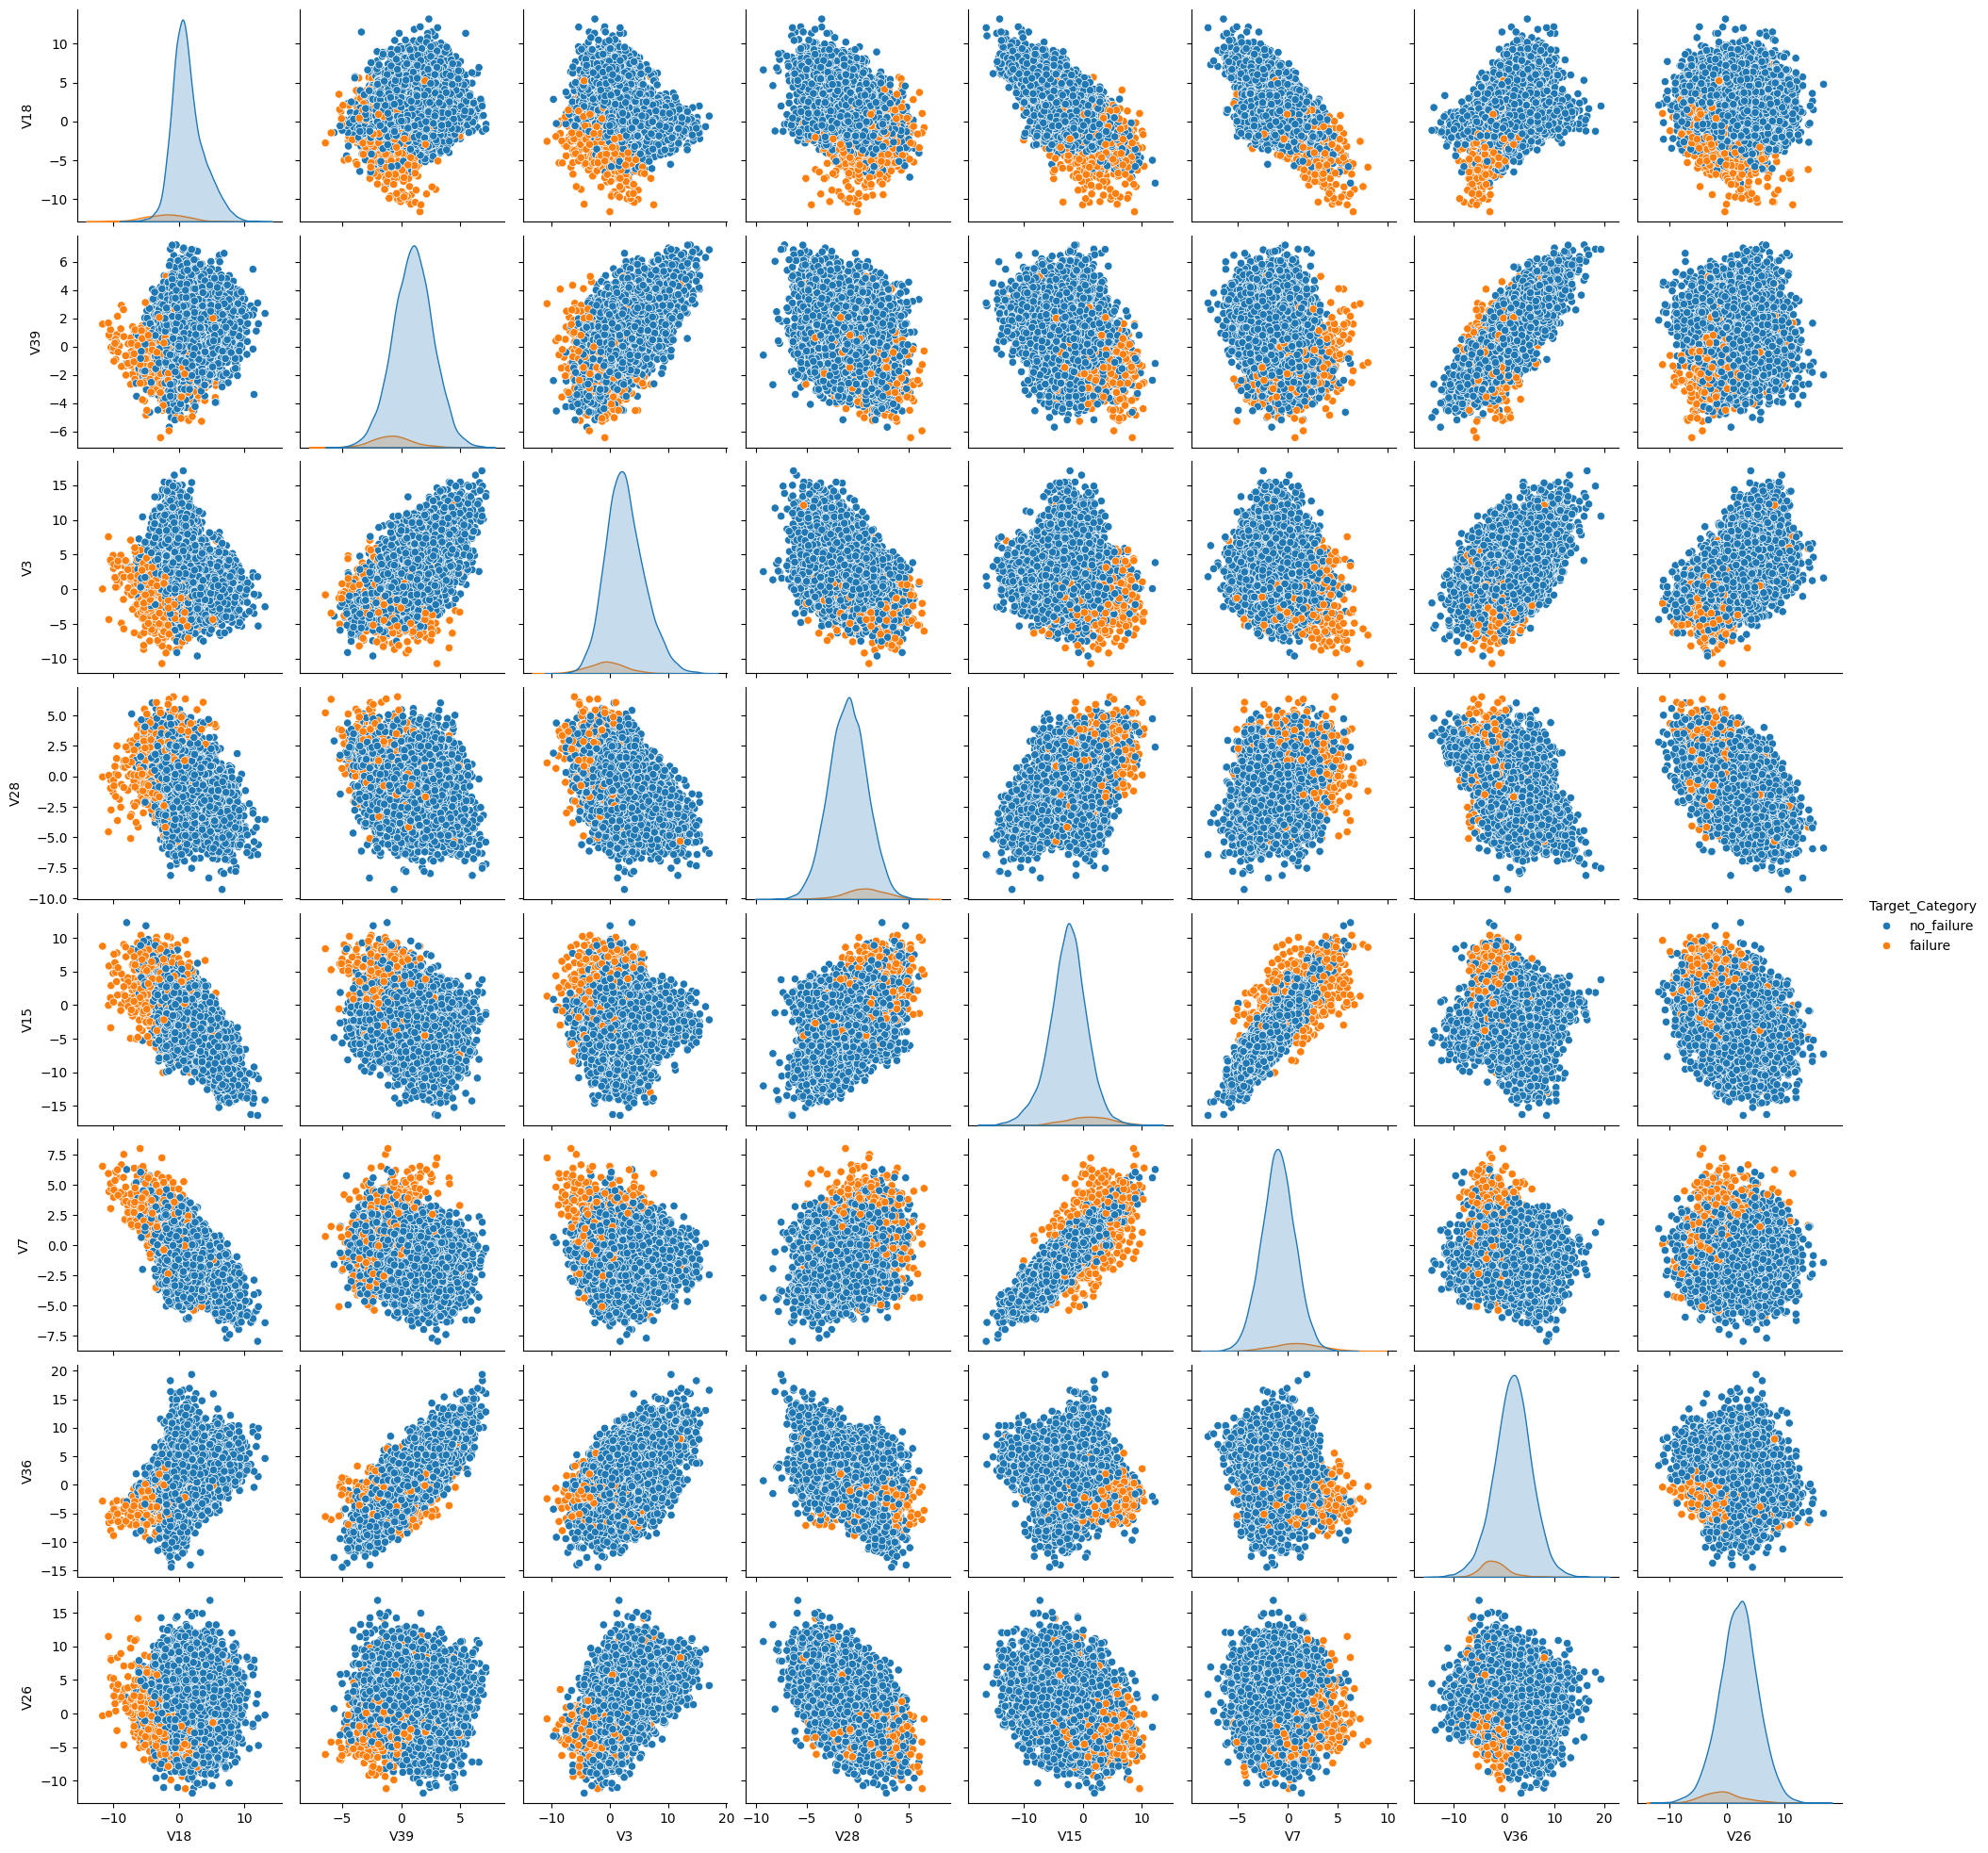

In [ ]:
# Plot pairplot for the selected columns
sns.pairplot(new_data, hue='Target_Category')
plt.show()

- v15 and v7 are quite correlated, the chance of failure significantly increases when v15 and v7 are together increase to above -5 and 0 respectively.

- v7 and v18 are also strongly negatively collerated, when v18 drops to somewhere around -5 and v7 increases to 0 and above,chance of failure increases.
- v15 and v18 are strongly correlated, when v15 increases above -5 and v18 drops below 0, chances of failure may increase.

These features may be be the strongest predictor of failuure, I will build an Ml model to confirm these theories.

## Data Pre-processing

In [ ]:
# Separating target variable and other variables
X = data1.drop(columns="Target")

Y = data1["Target"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)



print(X_train.shape, X_val.shape)

(14000, 40) (6000, 40)


## Missing value imputation




- I will be using K nearest neighbour object(KNN) to handle the mising data on the training and validation data set.
- The the KNN fits the training set using average of the closes neighbours of the mising datapoints, then transforms the missing values in the training and validation set based on the calculations done this pattern.
- I will set the KNN to use 5 nearest neighbours when performing the fitting.
- This will help prevent data leakage.

In [ ]:
data1.isnull().sum() #checking for missing values again

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are missing data v1 and v2

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "V1",
    "V2",
]

In [ ]:
# defining the KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val_imputed = imputer.transform(X_val[reqd_col_for_impute])

# Assigning the imputed values back to the original dataframes
X_train.loc[:, reqd_col_for_impute] = X_train_imputed
X_val.loc[:, reqd_col_for_impute] = X_val_imputed

In [ ]:
# Checking that no column has missing values in train, validation sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


There are no missing data in v1 and v2 as they have successfully been imputed.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

I will be building multiple models on training  data, I will use the K-FOLD cross validation to assess performance on the training set, whilw validating performance on a validation set.

Building multiple models with original data

In [ ]:
%%time
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

models.append(("RIDGE", RidgeClassifier(random_state=1, alpha=0.3)))
models.append(("LOGISTIC REGRESSION", LogisticRegression(random_state=1)))
models.append(("Lasso", LogisticRegression(random_state=1, penalty='l1', solver='liblinear', C=3.0)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7078246484698097
Bagging: 0.707808105872622
Random forest: 0.7181224152191894
GBM: 0.7220016542597187
Adaboost: 0.6447559966914805
Xgboost: 0.8069727047146401
RIDGE: 0.029594706368899916
LOGISTIC REGRESSION: 0.4902481389578163
Lasso: 0.4902481389578163

Validation Performance:

dtree: 0.7057057057057057
Bagging: 0.7267267267267268
Random forest: 0.7357357357357357
GBM: 0.7357357357357357
Adaboost: 0.6516516516516516
Xgboost: 0.8258258258258259
RIDGE: 0.04804804804804805
LOGISTIC REGRESSION: 0.5015015015015015
Lasso: 0.5015015015015015
CPU times: user 5min 20s, sys: 1.66 s, total: 5min 22s
Wall time: 5min 26s


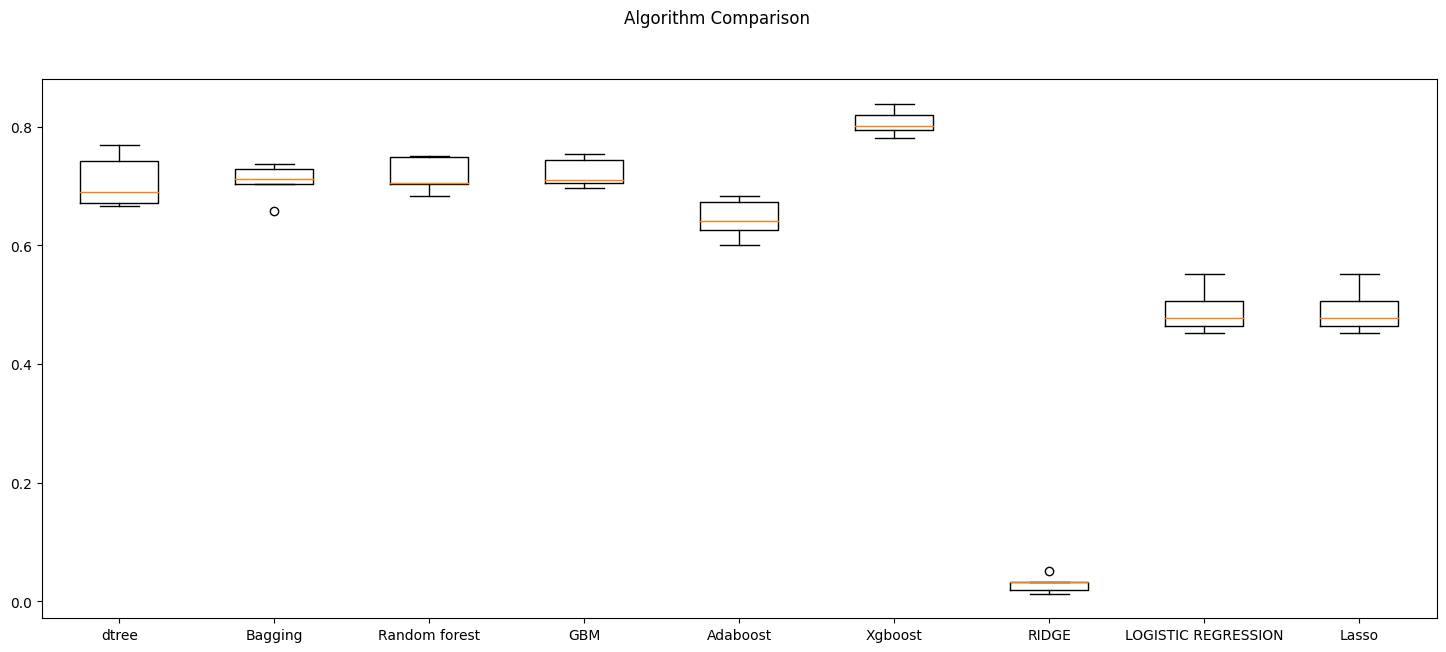

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- Most of the models apppear to performing well with very little overfitting on validation. However, the ridge model happens to be suffering from severe underfitting.

- The XGB model on original data seems to have the best performance at 82% in validation with no over fiiting.
- Next I will attempt to re train these deafault models again on oversampled and undersampled datasets since the target column seems to have a markedly imbalanced class.

### Model Building with Oversampled data


I will be oversampling the imbalance target class using SMOTE.

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
models_oversampled = []  # Empty list to store all the models
# Define your models
models_oversampled = [
    ("dtree", DecisionTreeClassifier(random_state=1)),
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")),
    ("RIDGE", RidgeClassifier(random_state=1, alpha=0.3)),
    ("LASSO", LogisticRegression(random_state=1, penalty='l1', solver='liblinear', C=3.0)),
    ("LOGISTIC REGRESSION", LogisticRegression(random_state=1)),
]
results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)



print("\n" "Cross-Validation performance on training dataset:" "\n")

for name2, model in models_oversampled:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result2 = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result2)
    names2.append(name2)
    print("{}: {}".format(name2, cv_result2.mean()))

# Evaluate models
print("\nValidation Performance with Oversampled Data:\n")
for name2, model in models_oversampled:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name2, scores))


Cross-Validation performance on training dataset:

dtree: 0.9704307788222577
Bagging: 0.975195084494193
Random forest: 0.9828333938667712
GBM: 0.9332226477039715
Adaboost: 0.904787470436327
Xgboost: 0.9903955455016028
RIDGE: 0.90077950862101
LASSO: 0.8916288261184148
LOGISTIC REGRESSION: 0.8917044404851445

Validation Performance with Oversampled Data:

dtree: 0.7837837837837838
Bagging: 0.8258258258258259
Random forest: 0.8558558558558559
GBM: 0.8798798798798799
Adaboost: 0.8618618618618619
Xgboost: 0.8528528528528528
RIDGE: 0.8528528528528528
LASSO: 0.8498498498498499
LOGISTIC REGRESSION: 0.8498498498498499


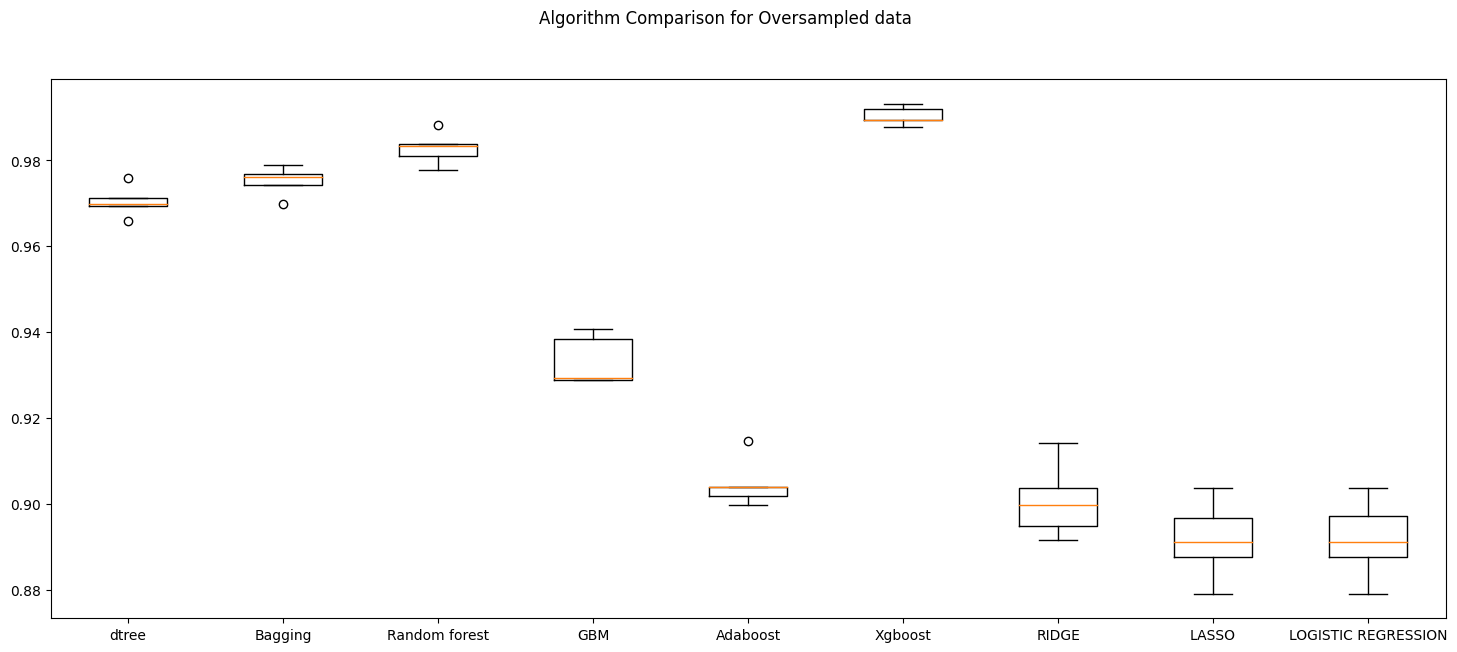

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 7))

fig.suptitle("Algorithm Comparison for Oversampled data")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show()

- After oversampling, performnace seem to have improved accross all models including the ridge model that was previously underfitting on original data but now performing well.
- Overfitting has also increased following oversampling.
- GBM now happens to be the best performing model on the oversampled data at about 87%.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
%%time
models_un = []  # Empty list to store all the models
# Define your models
models_un = [
    ("dtree", DecisionTreeClassifier(random_state=1)),
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")),
    ("RIDGE", RidgeClassifier(random_state=1, alpha=0.3)),
    ("LASSO", LogisticRegression(random_state=1, penalty='l1', solver='liblinear', C=3.0)),
    ("LOGISTIC REGRESSION", LogisticRegression(random_state=1)),
]
results3= []  # Empty list to store all model's CV scores
names3 = []  # Empty list to store name of the models
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)



print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names3.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Evaluate models
print("\nValidation Performance with Oversampled Data:\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8622167080231596
Bagging: 0.880339123242349
Random forest: 0.9034822167080232
GBM: 0.8932009925558313
Adaboost: 0.8725971877584782
Xgboost: 0.8983457402812242
RIDGE: 0.8816377171215881
LASSO: 0.8726220016542598
LOGISTIC REGRESSION: 0.8726220016542598

Validation Performance with Oversampled Data:

dtree: 0.8408408408408409
Bagging: 0.8708708708708709
Random forest: 0.8828828828828829
GBM: 0.8828828828828829
Adaboost: 0.8588588588588588
Xgboost: 0.8858858858858859
RIDGE: 0.8498498498498499
LASSO: 0.8468468468468469
LOGISTIC REGRESSION: 0.8468468468468469
CPU times: user 35.1 s, sys: 837 ms, total: 35.9 s
Wall time: 33.8 s


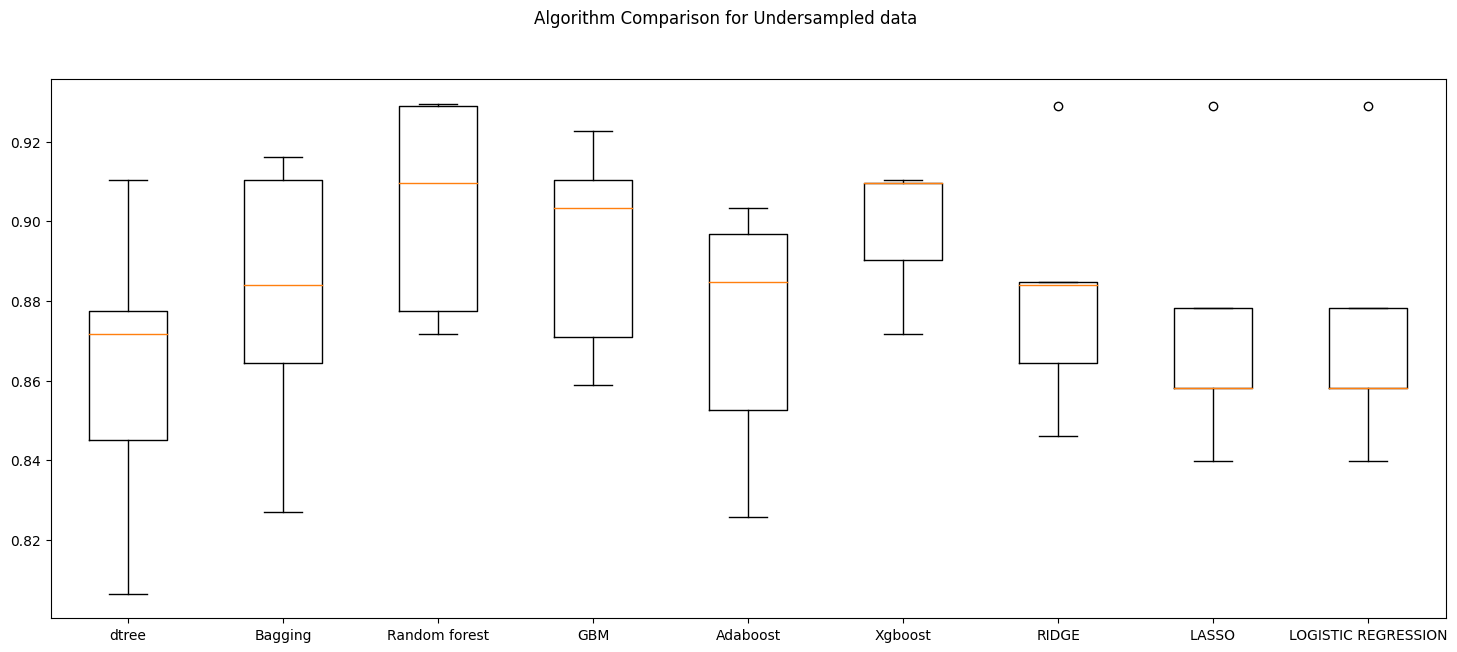

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 7))

fig.suptitle("Algorithm Comparison for Undersampled data")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names3)

plt.show()

- Following undersampling, a lot of models also have remarkable improvement when trained with the undersampled data.
- Infact, in addition to the recal performance improvement there is also no overffiting in some models when compared to when they were trained with original data or oversampled data.
- The model with best performance when trained with undersampled data include: XGB, RandomForest, and GB models. They have the best recal performance on the validation set and the least overfitting.

- Therefore, these top three models are what I will be hypertuning to squeeze out more performance.

## HyperparameterTuning

- I will be tuning the XGB, RandomForest, and GBM trained on Original,oversampled, and undersampled dataset using the Grid Search and Randomized Search. Then cross validate recall performance on training using kfold and also validate using the validation set.

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#### Tuning GBM model with original data

###GBM model tuning

####Tuning GBM model with original data

#####RandomSearchCV

In [ ]:
%%time
# defining model
Model_tune1 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid1 = {"n_estimators": np.arange(50,250,20), "learning_rate": [0.2,0.01, 0.05,1], "subsample":[0.8,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}

#Calling RandomizedSearchCV
randomized_cv1 = RandomizedSearchCV(estimator=Model_tune1, param_distributions=param_grid1, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv1.best_params_,randomized_cv1.best_score_))



Best parameters are {'subsample': 0.6, 'n_estimators': 190, 'max_features': 0.3, 'learning_rate': 0.2} with CV score=0.763217535153019:
CPU times: user 18.1 s, sys: 1.71 s, total: 19.9 s
Wall time: 18min 24s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_rand = GradientBoostingClassifier(
    max_features=0.3,
    random_state=1,
    learning_rate=0.2,
    n_estimators=190,
    subsample=0.6
)

# Fit the best algorithm to the data.
GBM_tuned_rand.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.3,
                           n_estimators=190, random_state=1, subsample=0.6)

In [ ]:
cv_result_GBM_rand = cross_val_score(
        estimator=GBM_tuned_rand, X=X_train, y=y_train, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON ORIGINAL DATA: {}".format(cv_result_GBM_rand.mean()))

GBM_TUNED CV RECALL SCORE ON ORIGINAL DATA: 0.763217535153019


In [ ]:
gbm_tuned_train_rand= model_performance_classification_sklearn(GBM_tuned_rand, X_train, y_train)
gbm_tuned_train_rand

Accuracy  Recall  Precision    F1
0     0.997   0.954      0.987 0.970

In [ ]:
gbm_tuned_val_rand= model_performance_classification_sklearn(GBM_tuned_rand, X_val, y_val)
gbm_tuned_val_rand

Accuracy  Recall  Precision    F1
0     0.983   0.790      0.895 0.839

- Performance on the model here using parameters from the Randomized Search seem to have improved.
- However, overfitting has increased making the model unusable in unseen data.

#####GRIDSEARCHCV

In [ ]:
%%time
# defining model
Model_tune1 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid1 = {"n_estimators": np.arange(140,350,50), "learning_rate": [0.2,0.15,0.25, 0.05], "subsample":[0.7,0.6], "max_features":[0.3,0.36,0.25]}

#Calling RandomizedSearchCV
Grid_cv1 = GridSearchCV(estimator=Model_tune1, param_grid=param_grid1, n_jobs = -1, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
Grid_cv1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(Grid_cv1.best_params_,Grid_cv1.best_score_))

Best parameters are {'learning_rate': 0.15, 'max_features': 0.25, 'n_estimators': 340, 'subsample': 0.7} with CV score=0.7838544251447478:
CPU times: user 53.7 s, sys: 7.05 s, total: 1min
Wall time: 1h 13min 55s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_grid = GradientBoostingClassifier(
    max_features=0.25,
    random_state=1,
    learning_rate=0.15,
    n_estimators=340,
    subsample=0.7
)

# Fit the best algorithm to the data.
GBM_tuned_grid.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_features=0.25,
                           n_estimators=340, random_state=1, subsample=0.7)

In [ ]:
cv_result_grid = cross_val_score(
        estimator=GBM_tuned_grid, X=X_train, y=y_train, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON ORIGINAL DATA: {}".format( cv_result_grid.mean()))

GBM_TUNED CV RECALL SCORE ON ORIGINAL DATA: 0.7838544251447478


In [ ]:
gbm_tuned_grid_train = model_performance_classification_sklearn(GBM_tuned_grid, X_train, y_train)
gbm_tuned_grid_train

Accuracy  Recall  Precision    F1
0     0.999   0.983      0.997 0.990

In [ ]:
gbm_tuned_grid_val = model_performance_classification_sklearn(GBM_tuned_grid, X_val, y_val)
gbm_tuned_grid_val

Accuracy  Recall  Precision    F1
0     0.982   0.799      0.866 0.831

The GBM model tune with Gridsearch and trained with original data is having similiar performance with the one tuned with the Randomizedsearch.

#### Tuning GBM model with oversampled data

#####RandomSerchCV

In [ ]:
%%time
# defining model
Model_tune2 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid2 =  {"n_estimators": np.arange(50,250,20), "learning_rate": [0.2,0.01, 0.05,1], "subsample":[0.8,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}


#Calling RandomizedSearchCV
randomized_cv2 = RandomizedSearchCV(estimator=Model_tune2, param_distributions=param_grid2, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv2.best_params_,randomized_cv2.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 215, 'max_features': 0.2, 'learning_rate': 1} with CV score=0.9722450946466517:
CPU times: user 28.7 s, sys: 2.64 s, total: 31.4 s
Wall time: 22min 39s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_rand_oversampled = GradientBoostingClassifier(
    max_features=0.2,
    random_state=1,
    learning_rate=1,
    n_estimators=215,
    subsample=0.7
)

# Fit the best algorithm to the data.
GBM_tuned_rand_oversampled.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.2, n_estimators=215,
                           random_state=1, subsample=0.7)

In [ ]:
cv_result_Random_over = cross_val_score(
        estimator=GBM_tuned_rand_oversampled, X=X_train_over, y=y_train_over, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON OVERSAMPLED DATA: {}".format( cv_result_Random_over.mean()))

GBM_TUNED CV RECALL SCORE ON OVERSAMPLED DATA: 0.9722450946466517


In [ ]:
gbm_tuned_random_train = model_performance_classification_sklearn(GBM_tuned_rand_oversampled, X_train, y_train)
gbm_tuned_random_train

Accuracy  Recall  Precision    F1
0     0.990   0.978      0.858 0.914

In [ ]:
gbm_tuned_random_val = model_performance_classification_sklearn(GBM_tuned_rand_oversampled, X_val, y_val)
gbm_tuned_random_val

Accuracy  Recall  Precision    F1
0     0.958   0.814      0.584 0.680

- Performance here on recall still has a lot of overfitting.
- Recall performance on validation has also improved slightly when compared to performance on tuned model trained on original data.

#####GRIDSEARCHCV

In [ ]:
%%time
# defining model
Model_tune2 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid2 = {"n_estimators": np.arange(300,420,40), "learning_rate": [0.15], "subsample":[0.7], "max_features":[0.3]}

#Calling RandomizedSearchCV
Grid_cv2 = GridSearchCV(estimator=Model_tune2, param_grid=param_grid2, n_jobs = -1, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
Grid_cv2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(Grid_cv2.best_params_,Grid_cv2.best_score_))

Best parameters are {'learning_rate': 0.15, 'max_features': 0.3, 'n_estimators': 380, 'subsample': 0.7} with CV score=0.9722450374497024:
CPU times: user 43.8 s, sys: 684 ms, total: 44.5 s
Wall time: 6min 25s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_grid_over = GradientBoostingClassifier(
    max_features=0.3,
    random_state=1,
    learning_rate=0.15,
    n_estimators=380,
    subsample=0.7
)

# Fit the best algorithm to the data.
GBM_tuned_grid_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.15, max_features=0.3,
                           n_estimators=380, random_state=1, subsample=0.7)

In [ ]:
cv_result_Grid_over2 = cross_val_score(
        estimator=GBM_tuned_grid_over, X=X_train_over, y=y_train_over, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON OVERSAMPLED DATA: {}".format( cv_result_Grid_over2.mean()))

GBM_TUNED CV RECALL SCORE ON OVERSAMPLED DATA: 0.9722450374497024


In [ ]:
gbm_tuned_grid_over_train = model_performance_classification_sklearn(GBM_tuned_grid_over, X_train, y_train)
gbm_tuned_grid_over_train

Accuracy  Recall  Precision    F1
0     0.995   0.992      0.930 0.960

In [ ]:
gbm_tuned_grid_over_val = model_performance_classification_sklearn(GBM_tuned_grid_over, X_val, y_val)
gbm_tuned_grid_over_val

Accuracy  Recall  Precision    F1
0     0.982   0.877      0.813 0.844

-  Performance on reacall has even further improved here, but overfiiting is still a problem.

#### Tuning GBM model with undersampled data

#####RandomSearchCV

In [ ]:
%%time
# defining model
Model_tune3 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid3 = {"n_estimators": np.arange(50,250,20), "learning_rate": [0.2,0.3,0.15,0.05,0.4], "subsample":[0.8,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}

#Calling RandomizedSearchCV
randomized_cv3 = RandomizedSearchCV(estimator=Model_tune3, param_distributions=param_grid3, n_iter=30, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv3.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv3.best_params_,randomized_cv3.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 190, 'max_features': 0.6, 'learning_rate': 0.3} with CV score=0.9073366418527709:
CPU times: user 3.78 s, sys: 254 ms, total: 4.03 s
Wall time: 2min 18s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_undersampled1 = GradientBoostingClassifier(
    max_features=0.6,
    random_state=1,
    learning_rate=0.3,
    n_estimators=190,
    subsample=0.7
)

# Fit the best algorithm to the data.
GBM_tuned_undersampled1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.3, max_features=0.6,
                           n_estimators=190, random_state=1, subsample=0.7)

In [ ]:
cv_result_Random_un = cross_val_score(
        estimator=GBM_tuned_undersampled1, X=X_train_un, y=y_train_un, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON UNDERSAMPLED DATA: {}".format( cv_result_Random_un.mean()))

GBM_TUNED CV RECALL SCORE ON UNDERSAMPLED DATA: 0.9073366418527709


In [ ]:
gbm_tuned_random_train = model_performance_classification_sklearn(GBM_tuned_undersampled1, X_train, y_train)
gbm_tuned_random_train

Accuracy  Recall  Precision    F1
0     0.941   1.000      0.485 0.653

In [ ]:
gbm_tuned_random_val = model_performance_classification_sklearn(GBM_tuned_undersampled1, X_val, y_val)
gbm_tuned_random_val

Accuracy  Recall  Precision    F1
0     0.921   0.886      0.403 0.554

#####GridsearchCV

In [ ]:
%%time
# defining model
Model_tune3 = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid3 = {"n_estimators": np.arange(87,89,1), "learning_rate": [0.15,0.17] ,"subsample":[0.2,0.25], "max_features":[0.67,0.68]}

#Calling RandomizedSearchCV
Grid_cv3 = GridSearchCV(estimator=Model_tune3, param_grid=param_grid3, n_jobs = -1, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
Grid_cv3.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(Grid_cv3.best_params_,Grid_cv3.best_score_))

Best parameters are {'learning_rate': 0.15, 'max_features': 0.67, 'n_estimators': 87, 'subsample': 0.25} with CV score=0.9009015715467328:
CPU times: user 938 ms, sys: 92.8 ms, total: 1.03 s
Wall time: 23.6 s


In [ ]:
# Set the clf to the best combination of parameters
GBM_tuned_undersampled = GradientBoostingClassifier(
    max_features=0.67,
    random_state=1,
    learning_rate=0.15,
    n_estimators=87,
    subsample=0.2
)

# Fit the best algorithm to the data.
GBM_tuned_undersampled.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.15, max_features=0.67,
                           n_estimators=87, random_state=1, subsample=0.2)

In [ ]:
cv_result_un = cross_val_score(
        estimator=GBM_tuned_undersampled, X=X_train_un, y=y_train_un, scoring=scorer, cv=5)
print("GBM_TUNED CV RECALL SCORE ON UNDERSAMPLED DATA: {}".format( cv_result_un.mean()))

GBM_TUNED CV RECALL SCORE ON UNDERSAMPLED DATA: 0.8803225806451612


In [ ]:
gbm_tuned_grid_train = model_performance_classification_sklearn(GBM_tuned_undersampled, X_train, y_train)
gbm_tuned_grid_train

Accuracy  Recall  Precision    F1
0     0.896   0.942      0.343 0.502

In [ ]:
gbm_tuned_grid_val_un= model_performance_classification_sklearn(GBM_tuned_undersampled, X_val, y_val)
gbm_tuned_grid_val_un

Accuracy  Recall  Precision    F1
0     0.882   0.889      0.306 0.455

- Performace on recall on the GBM model has improved significantly when trained on undersampled data and tuned with Gridsearch and Randomizedsearch.
- There is also very little overfitting when compared to all other tuned models so far.
- Infact, the GB model trained on undersampled data and tuned on Gridsearch is perfectly fitted and should generalize well on unseen data.

###RandomForest Model tuning

####Tuning Random Forest model with Original data

#####RandomSearch CV

In [ ]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.4, 0.8, 0.1),'sqrt'], "max_samples": np.arange(0.2, 0.6, 0.1) }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=25, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt'} with CV score=0.6705955334987592:
CPU times: user 25.6 s, sys: 1.97 s, total: 27.5 s
Wall time: 14min 53s


In [ ]:
# building model with best parameters
RF_tuned_random = RandomForestClassifier(
    max_depth= 5,
    max_samples = 0.5,
    n_estimators = 200,
    min_samples_leaf= 2,
)

# Fit the model on training data
RF_tuned_random .fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.5, min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
cv_result_RF_tuned_Grid = cross_val_score(
        estimator=RF_tuned_random, X=X_train, y=y_train, scoring=scorer, cv=5)
print("RF_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: {}".format( cv_result_RF_tuned_Grid.mean()))

RF_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: 0.40149710504549213


In [ ]:
## To check the performance on training set
RF_tuned_random_train = model_performance_classification_sklearn(
    RF_tuned_random , X_train, y_train
)
RF_tuned_random_train

Accuracy  Recall  Precision    F1
0     0.971   0.475      1.000 0.644

In [ ]:
## To check the performance on validation set
RF_tuned_random_val = model_performance_classification_sklearn(
    RF_tuned_random , X_val, y_val
)
RF_tuned_random_val

Accuracy  Recall  Precision    F1
0     0.968   0.426      0.986 0.595

- Tuning here has made the Randomforest model performance RECALL to decrease significantly, though precision perform has gone up with very little over fitting there.

#####GridSearch Cv

In [ ]:
# Choose the type of classifier.
RF_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [25,300,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.9, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=RF_estimator, param_grid=parameters, scoring=scorer, cv=4, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 4 folds for each of 54 candidates, totalling 216 fits
Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 300} with CV score=0.6937285223367697:


In [ ]:
# building model with best parameters
RF_tuned_grid = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6,
)

# Fit the model on training data
RF_tuned_grid.fit(X_train, y_train)


RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
cv_result_RF_tuned = cross_val_score(
        estimator=RF_tuned_grid, X=X_train, y=y_train, scoring=scorer, cv=5)
print("RF_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: {}".format( cv_result_RF_tuned.mean()))

RF_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: 0.6950454921422662


In [ ]:
RF_tuned_grid_train = model_performance_classification_sklearn(
    RF_tuned_grid, X_train, y_train
)
RF_tuned_grid_train

Accuracy  Recall  Precision    F1
0     0.995   0.909      1.000 0.952

In [ ]:
RF_tuned_grid_val = model_performance_classification_sklearn(
    RF_tuned_grid, X_val, y_val
)
RF_tuned_grid_val

Accuracy  Recall  Precision    F1
0     0.984   0.712      0.988 0.827

- Performance here has also detoriorated heare on recall, Though its not as bad as the previous one tuned with RandomIZEDSEARCH.

####Tuning Random Forest model with Oversampled data

#####RandomSearchCV

In [ ]:
%%time

# defining model
RF_estimator = RandomForestClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
parameters = {
    "n_estimators": [25,300,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.9, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=RF_estimator, param_distributions=parameters, n_jobs = -1, n_iter=40, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9817736773920478:
CPU times: user 54.1 s, sys: 7.34 s, total: 1min 1s
Wall time: 17min 20s


In [ ]:
# building model with best parameters
RF_tuned_random_over = RandomForestClassifier(
    max_features = 5,
    max_samples = 0.6,
    n_estimators = 300,
    min_samples_leaf= 1,
)

# Fit the model on training data
RF_tuned_random_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features=5, max_samples=0.6, n_estimators=300)

In [ ]:
cv_result_RF_tuned_over_random = cross_val_score(
        estimator=RF_tuned_random_over, X=X_train_over, y=y_train_over, scoring=scorer, cv=5)
print("RF_TUNED_GRID RECALL SCORE ON OVERSAMPLED DATA: {}".format( cv_result_RF_tuned_over_random.mean()))

RF_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: 0.9811687624582104


In [ ]:
## To check the performance on training set
RF_tuned_random_train_over = model_performance_classification_sklearn(
    RF_tuned_random_over, X_train_over, y_train_over
)
RF_tuned_random_train_over

Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 1.000

In [ ]:
## To check the performance on validation set
RF_tuned_random_val_over = model_performance_classification_sklearn(
    RF_tuned_random_over, X_val, y_val
)
RF_tuned_random_val_over

Accuracy  Recall  Precision    F1
0     0.987   0.856      0.896 0.876

#####GridSearchCV

In [ ]:
# Choose the type of classifier.
RF_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [290,310],
    "min_samples_leaf": [1],
    "max_features": ['auto'],
    "max_samples": [0.6]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=RF_estimator, param_grid=parameters, scoring=scorer, cv=4, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:".format(grid_cv.best_params_, grid_cv.best_score_))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best parameters are {'max_features': 'auto', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 310} with CV score=0.9803369017776324:


In [ ]:
# building model with best parameters
RF_tuned_grid_over = RandomForestClassifier(
    n_estimators=310,
    min_samples_leaf=1,
    max_features='auto',
    max_samples=0.6,
)

# Fit the model on training data
RF_tuned_grid_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='auto', max_samples=0.6, n_estimators=310)

In [ ]:
cv_result_RF_tuned_grid_over = cross_val_score(
        estimator=RF_tuned_grid_over, X=X_train_over, y=y_train_over, scoring=scorer, cv=5)
print("RF_TUNED_GRID RECALL SCORE ON OVERSAMPLED DATA: {}".format( cv_result_RF_tuned_grid_over.mean()))

RF_TUNED_GRID RECALL SCORE ON OVERSAMPLED DATA: 0.9812443196279912


In [ ]:
RF_tuned_grid_train_over = model_performance_classification_sklearn(
    RF_tuned_grid_over, X_train_over, y_train_over
)
RF_tuned_grid_train_over

Accuracy  Recall  Precision    F1
0     0.999   0.999      1.000 0.999

In [ ]:
RF_tuned_grid_val_over = model_performance_classification_sklearn(
    RF_tuned_grid_over, X_val, y_val
)
RF_tuned_grid_val_over

Accuracy  Recall  Precision    F1
0     0.986   0.856      0.882 0.869

- Performance for RandomForest trained on Oversampled data is good and is similiar between Randomized search and grid search, but Overfitting is still a major problem.

####Tuning Random Forest model with Undersampled data

#####RandomSearchCv

In [ ]:
# Choose the type of classifier.
RF_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [290,300,310,350,400],
    "min_samples_leaf": [1,3,1.5],
    "max_features": ['auto','sqrt',0.6,0.5],
    "max_samples": [0.6,0.7,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
rand_cv = RandomizedSearchCV(estimator=RF_estimator, param_distributions=parameters, scoring=scorer, cv=3,  n_iter=30,n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
rand_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:".format(rand_cv.best_params_, rand_cv.best_score_))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters are {'n_estimators': 310, 'min_samples_leaf': 1, 'max_samples': 0.7, 'max_features': 'sqrt'} with CV score=0.9795053784120324:


In [ ]:
# building model with best parameters
RF_tuned_random_un = RandomForestClassifier(
    max_features = 'sqrt',
    max_samples = 0.7,
    n_estimators = 310,
    min_samples_leaf= 1,
)

# Fit the model on training data
RF_tuned_random_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.7, n_estimators=310)

In [ ]:
cv_result_RF_tuned_un_random = cross_val_score(
        estimator=RF_tuned_random_un, X=X_train_un, y=y_train_un, scoring=scorer, cv=5)
print("RF_TUNED_RandomizedSearch RECALL SCORE ON UNDERSAMPLED DATA: {}".format( cv_result_RF_tuned_un_random.mean()))

RF_TUNED_RandomizedSearch RECALL SCORE ON UNDERSAMPLED DATA: 0.9034574028122415


In [ ]:
## To check the performance on training set
RF_tuned_random_train_un = model_performance_classification_sklearn(
    RF_tuned_random_un, X_train_un, y_train_un
)
RF_tuned_random_train_un

Accuracy  Recall  Precision    F1
0     0.997   0.994      1.000 0.997

In [ ]:
## To check the performance on validation set
RF_tuned_random_val_un = model_performance_classification_sklearn(
    RF_tuned_random_un, X_val, y_val
)
RF_tuned_random_val_un

Accuracy  Recall  Precision    F1
0     0.933   0.880      0.447 0.593

#####GridSearchCV

In [ ]:
# Choose the type of classifier.
RF_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [90,120,320],
    "min_samples_leaf": [1],
    "max_samples": [0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=RF_estimator, param_grid=parameters, scoring=scorer, cv=3, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters are {'max_samples': 0.7, 'min_samples_leaf': 1, 'n_estimators': 90} with CV score=0.9009009009009009:


In [ ]:
# building model with best parameters
RF_tuned_grid_un = RandomForestClassifier(
    n_estimators=90,
    min_samples_leaf=1,

    max_samples=0.7,
)

# Fit the model on training data
RF_tuned_grid_un.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.7, n_estimators=90)

In [ ]:
cv_result_RF_tuned_un = cross_val_score(
        estimator=RF_tuned_grid, X=X_train_un, y=y_train_un, scoring=scorer, cv=5)
print("RF_TUNED_GRID RECALL SCORE ON Undersampled DATA: {}".format( cv_result_RF_tuned_un.mean()))

RF_TUNED_GRID RECALL SCORE ON Undersampled DATA: 0.9034656741108356


In [ ]:
RF_tuned_grid_train_un = model_performance_classification_sklearn(
    RF_tuned_grid_un, X_train_un, y_train_un
)
RF_tuned_grid_train_un

Accuracy  Recall  Precision    F1
0     0.999   0.999      1.000 0.999

In [ ]:
RF_tuned_grid_val_un = model_performance_classification_sklearn(
    RF_tuned_grid, X_val, y_val
)
RF_tuned_grid_val_un

Accuracy  Recall  Precision    F1
0     0.984   0.712      0.988 0.827

-- Just like Randomforest trained on Overfitted data, performance on recall is similiar when tuned, with over fitting still aproblem here.
- The tuned and sampled Randomforest model has not matched up with the performance on recall of the tuned and SAmpled data GBM so far.

###XGB MODEL TUNING

####Tuning XGB model with Original data

#####RandomSearchCV

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1)

param_grid={ 'n_estimators': [90, 120, 80],'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=25, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 90, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.7941439205955334:
CPU times: user 3.22 s, sys: 265 ms, total: 3.49 s
Wall time: 1min 20s


In [ ]:
# building model with best parameters
XGB_tuned_random = XGBClassifier(
    learning_rate= 0.2,
    gamma = 0,
    n_estimators = 200,
    subsample= 0.8,
)

# Fit the model on training data
XGB_tuned_random .fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
cv_result_XGB_tuned_rand = cross_val_score(
        estimator=XGB_tuned_random, X=X_train, y=y_train, scoring=scorer, cv=5)
print("XGB_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: {}".format( cv_result_XGB_tuned_rand.mean()))

XGB_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: 0.8018693134822167


In [ ]:
## To check the performance on training set
XGB_random_train = model_performance_classification_sklearn(
    XGB_tuned_random , X_train, y_train
)
XGB_random_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
## To check the performance on validation set
XGB_random_val = model_performance_classification_sklearn(
    XGB_tuned_random , X_val, y_val
)
XGB_random_val

Accuracy  Recall  Precision    F1
0     0.989   0.817      0.978 0.890

#####GridSearchCV

In [ ]:
# Choose the type of classifier.
XGB_estimator = XGBClassifier(random_state=1)

# Grid of parameters to choose from
param_grid={ 'n_estimators': [80,105, 140],'learning_rate': [0.15,0.1,0.2], 'gamma': [0,1], 'subsample': [0.8,0.9] }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=XGB_estimator, param_grid=param_grid, scoring=scorer, cv=4, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 140, 'subsample': 0.9} with CV score=0.8082606397039387:


In [ ]:
# building model with best parameters
XGB_tuned_grid = XGBClassifier(
    learning_rate= 0.2,
    gamma = 0,
    n_estimators = 140,
    subsamples= 0.9,
)

# Fit the model on training data
XGB_tuned_grid .fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
cv_result_XGB_tuned_grid = cross_val_score(
        estimator=XGB_tuned_grid, X=X_train, y=y_train, scoring=scorer, cv=5)
print("XGB_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: {}".format( cv_result_XGB_tuned_grid.mean()))

XGB_TUNED_GRID RECALL SCORE ON ORIGINAL DATA: 0.7992721257237385


In [ ]:
## To check the performance on training set
XGB_random_train_grid = model_performance_classification_sklearn(
    XGB_tuned_grid, X_train, y_train
)
XGB_random_train_grid

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
## To check the performance on validation set
XGB_random_val_grid = model_performance_classification_sklearn(
    XGB_tuned_grid , X_val, y_val
)
XGB_random_val_grid

Accuracy  Recall  Precision    F1
0     0.989   0.820      0.982 0.894

- Recall Performance of tuned XGB model on origninal data is quite similiar to the untuned XGB model on original data.

####Tuning XGB model with Oversampled data

#####GridSearch CV

In [ ]:
# Choose the type of classifier.
XGB_estimator = XGBClassifier(random_state=1)

# Grid of parameters to choose from
param_grid={ 'n_estimators': [80,105, 140],'learning_rate': [0.15,0.1,0.2], 'gamma': [0,1], 'subsample': [0.8,0.9] }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=XGB_estimator, param_grid=param_grid, scoring=scorer, cv=4, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'n_estimators': 140, 'subsample': 0.8} with CV score=0.9910005235060628:


In [ ]:
# building model with best parameters
XGB_tuned_grid_over = XGBClassifier(
    learning_rate= 0.2,
    gamma = 0,
    n_estimators = 140,
    subsamples= 0.8,
)

# Fit the model on training data
XGB_tuned_grid_over .fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
cv_result_XGB_tuned_grid_over = cross_val_score(
        estimator=XGB_tuned_grid_over, X=X_train_over, y=y_train_over, scoring=scorer, cv=5)
print("XGB_TUNED_GRID RECALL SCORE ON Oversampled DATA: {}".format( cv_result_XGB_tuned_grid_over.mean()))

XGB_TUNED_GRID RECALL SCORE ON Oversampled DATA: 0.9907733027520311


In [ ]:
## To check the performance on training set
XGB_train_grid_over = model_performance_classification_sklearn(
    XGB_tuned_grid_over, X_train_over, y_train_over
)
XGB_train_grid_over

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [ ]:
## To check the performance on validation set
XGB_val_grid_over= model_performance_classification_sklearn(
    XGB_tuned_grid_over , X_val, y_val
)
XGB_val_grid_over

Accuracy  Recall  Precision    F1
0     0.986   0.862      0.878 0.870

- Recakk performance after tuning has impreoved here, but significant overfitting is still a problem.

####Tuning XGB model with Undersampled data

#####GridSearch CV

In [ ]:
# Choose the type of classifier.
XGB_estimator = XGBClassifier(random_state=1)

# Grid of parameters to choose from
param_grid={ 'n_estimators': [80,105, 140],'learning_rate': [0.15,0.1,0.2], 'gamma': [0,1], 'subsample': [0.8,0.9] }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=XGB_estimator, param_grid=param_grid, scoring=scorer, cv=4, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.2, 'n_estimators': 140, 'subsample': 0.8} with CV score=0.9086108908273857:


In [ ]:
# building model with best parameters
XGB_tuned_grid_un = XGBClassifier(
    learning_rate= 0.2,
    gamma = 1,
    n_estimators = 140,
    subsample= 0.8,
)

# Fit the model on training data
XGB_tuned_grid_un .fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
cv_result_XGB_tuned_grid_un = cross_val_score(
        estimator=XGB_tuned_grid_un, X=X_train_un, y=y_train_un, scoring=scorer, cv=5)
print("XGB_TUNED_GRID RECALL SCORE ON Oversampled DATA: {}".format( cv_result_XGB_tuned_grid_un.mean()))

XGB_TUNED_GRID RECALL SCORE ON Oversampled DATA: 0.9034656741108353


In [ ]:
## To check the performance on training set
XGB_train_grid_un = model_performance_classification_sklearn(
    XGB_tuned_grid_un, X_train_un, y_train_un
)
XGB_train_grid_un

Accuracy  Recall  Precision    F1
0     0.988   0.978      0.999 0.988

In [ ]:
## To check the performance on validation set
XGB_val_grid_un= model_performance_classification_sklearn(
    XGB_tuned_grid_un , X_val, y_val
)
XGB_val_grid_un

Accuracy  Recall  Precision    F1
0     0.940   0.880      0.478 0.619

- Performance here is quite impressive and overfitting is very minimal.
- But this model's recall performance has not matched the tune GB model trained on undersampled data which did not have any overfitting.

## Model performance comparison and choosing the final model

###Cross validation training recall performances on tuned models

In [ ]:
# Calculate the mean cross-validation score
mean_cv_score1 = cv_result_XGB_tuned_rand.mean()
mean_cv_score2 = cv_result_XGB_tuned_grid_over.mean()
mean_cv_score3 = cv_result_XGB_tuned_grid_un.mean()
mean_cv_score4 = cv_result_grid.mean()
mean_cv_score5 = cv_result_Grid_over2.mean()
mean_cv_score6 = cv_result_un.mean()
mean_cv_score7 = cv_result_RF_tuned.mean()
mean_cv_score8 = cv_result_RF_tuned_over_random.mean()
mean_cv_score9 = cv_result_RF_tuned_un_random.mean()

# Print summary of cross-validated Recall training performance
print('Cross validated Recall training performance summary across tuned models:')
print("\n\n\n")
print("XGB_tuned with RANDOMIZEDSEARCH on original data:", mean_cv_score1)
print("XGB trained with Oversampled data Tuned with Grid search:", mean_cv_score2)
print("XGB trained with Undersampled data Tuned with Grid search:", mean_cv_score3)
print("Gradient Boosting trained with Original data Tuned with Grid search:", mean_cv_score4)
print("Gradient Boosting trained with Oversampled data Tuned with Grid search:", mean_cv_score5)
print("Gradient Boosting trained with Undersampled data Tuned with Grid search:", mean_cv_score6)
print("RandomForest model trained with original data tuned with grid search:", mean_cv_score7)
print("RandomForest model trained with Oversampled data tuned with random search:", mean_cv_score8)
print("RandomForest model trained with Undersampled data tuned with random search:", mean_cv_score9)


Cross validated Recall training performance summary across tuned models:




XGB_tuned with RANDOMIZEDSEARCH on original data: 0.8018693134822167
XGB trained with Oversampled data Tuned with Grid search: 0.9907733027520311
XGB trained with Undersampled data Tuned with Grid search: 0.9034656741108353
Gradient Boosting trained with Original data Tuned with Grid search: 0.7838544251447478
Gradient Boosting trained with Oversampled data Tuned with Grid search: 0.9722450374497024
Gradient Boosting trained with Undersampled data Tuned with Grid search: 0.8803225806451612
RandomForest model trained with original data tuned with grid search: 0.6950454921422662
RandomForest model trained with Oversampled data tuned with random search: 0.9811687624582104
RandomForest model trained with Undersampled data tuned with random search: 0.9034574028122415


###Validation performaces on tuned models.

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        XGB_random_val.T,
        XGB_val_grid_over.T,
        XGB_val_grid_un.T,
        gbm_tuned_grid_val.T,
        gbm_tuned_grid_over_val.T,
        gbm_tuned_grid_val_un.T,
        RF_tuned_grid_val .T,
        RF_tuned_random_val_over.T,
        RF_tuned_random_val_un.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGB trained with Original data Tuned with Randomized search",
    "XGB trained with Oversampled data Tuned with Grid search",
    "XGB trained with Undersampled data Tuned with Grid search",
    "Gradient Boosting trained with Original data  Tuned with Grid search",
    "Gradient Boosting trained with Oversampled data Tuned with Grid search",
    "Gradient Boosting trained with Undersampled data Tuned with Grid search",
    "RandomForest nodel trained with original data tuned with grid search",
    "RandomForest model trained with Oversampled data tuned with random search",
    "RandomForest model trained with Undersampled data tuned with random search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


XGB trained with Original data Tuned with Randomized search  \
Accuracy                                               0.990             
Recall                                                 0.826             
Precision                                              0.982             
F1                                                     0.897             

           XGB trained with Oversampled data Tuned with Grid search  \
Accuracy                                               0.986          
Recall                                                 0.862          
Precision                                              0.878          
F1                                                     0.870          

           XGB trained with Undersampled data Tuned with Grid search  \
Accuracy                                               0.934           
Recall                                                 0.886           
Precision                                              0.452           
F1                                                     0.598           

           Gradient Boosting trained with Original data  Tuned with Grid search  \
Accuracy                                               0.982                      
Recall                                                 0.799                      
Precision                                              0.866                      
F1                                                     0.831                      

           Gradient Boosting trained with Oversampled data Tuned with Grid search  \
Accuracy                                               0.982                        
Recall                                                 0.877                        
Precision                                              0.813                        
F1                                                     0.844                        

           Gradient Boosting trained with Undersampled data Tuned with Grid search  \
Accuracy                                               0.882                         
Recall                                                 0.889                         
Precision                                              0.306                         
F1                                                     0.455                         

           RandomForest nodel trained with original data tuned with grid search  \
Accuracy                                               0.984                      
Recall                                                 0.712                      
Precision                                              0.988                      
F1                                                     0.827                      

           RandomForest model trained with Oversampled data tuned with random search  \
Accuracy                                               0.987                           
Recall                                                 0.856                           
Precision                                              0.896                           
F1                                                     0.876                           

           RandomForest model trained with Undersampled data tuned with random search  
Accuracy                                               0.933                           
Recall                                                 0.880                           
Precision                                              0.447                           
F1                                                     0.593

- The Gradient boost model trained with undersampled data and tuned on Gridsearch is the best recall performer on validation data with no over fiiting.
- Hence this will be my final model.
- I will be testing it on the test data.

### Test set final performance

Before testing the data on my final model, the test data has to be prepocessed just like the validation and training data. I will also check and handle missing values on the test data.

####Preparing test data for final model

In [ ]:
data_test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.242 0.155  2.054 -2.772  1.851 -1.789 -0.277 -1.255 -3.833 -1.505  1.587   
1 -3.193 1.857 -1.708  0.633 -0.588  0.084  3.014 -0.182  0.224  0.865 -1.782   
2 -2.120 0.482 -0.841  1.790  1.874  0.364 -0.169 -0.484 -2.119 -2.157  2.907   
3 -3.260 0.105 -0.659  1.498  1.100  4.143 -0.248 -1.137 -5.356 -4.546  3.809   
4 -5.789 4.598  4.450  3.225  0.397  0.248 -2.362  1.079 -0.473  2.243 -3.591   

     V32    V33    V34   V35    V36    V37     V38    V39    V40  Target  
0  2.291 -5.411  0.870 0.574  4.157  1.428 -10.511  0.455 -1.448       0  
1 -2.475  2.494  0.315 2.059  0.684 -0.485   5.128  1.721 -1.488       0  
2 -1.319 -2.997  0.460 0.620  5.632  1.324  -1.752  1.808  1.676       0  
3  3.518 -3.074 -0.284 0.955  3.029 -1.367  -3.412  0.906 -2.451       0  
4  1.774 -1.502 -2.227 4.777 -6.560 -0.806  -0.276 -3.858 -0.538       0

In [ ]:
data_test.shape

(5000, 41)

In [ ]:
data_test.describe(include='all').T

count   mean   std     min    25%    50%    75%    max
V1     4995.000 -0.278 3.466 -12.382 -2.744 -0.765  1.831 13.504
V2     4994.000  0.398 3.140 -10.716 -1.649  0.427  2.444 14.079
V3     5000.000  2.552 3.327  -9.238  0.315  2.260  4.587 15.315
V4     5000.000 -0.049 3.414 -14.682 -2.293 -0.146  2.166 12.140
V5     5000.000 -0.080 2.111  -7.712 -1.615 -0.132  1.341  7.673
V6     5000.000 -1.042 2.005  -8.924 -2.369 -1.049  0.308  5.068
V7     5000.000 -0.908 1.769  -8.124 -2.054 -0.940  0.212  7.616
V8     5000.000 -0.575 3.332 -12.253 -2.642 -0.358  1.713 10.415
V9     5000.000  0.030 2.174  -6.785 -1.456 -0.080  1.450  8.851
V10    5000.000  0.019 2.145  -8.171 -1.353  0.166  1.511  6.599
V11    5000.000 -2.009 3.112 -13.152 -4.050 -2.043  0.044  9.956
V12    5000.000  1.576 2.907  -8.164 -0.450  1.488  3.563 12.984
V13    5000.000  1.622 2.883 -11.548 -0.126  1.719  3.465 12.620
V14    5000.000 -0.921 1.803  -7.814 -2.111 -0.896  0.272  5.734
V15    5000.000 -2.452 3.387 -15.286 -4.479 -2.417 -0.433 11.673
V16    5000.000 -3.019 4.264 -20.986 -5.648 -2.774 -0.178 13.976
V17    5000.000 -0.104 3.337 -13.418 -2.228  0.047  2.112 19.777
V18    5000.000  1.196 2.586 -12.214 -0.409  0.881  2.604 13.642
V19    5000.000  1.210 3.385 -14.170 -1.026  1.296  3.526 12.428
V20    5000.000  0.138 3.657 -13.720 -2.325  0.193  2.540 13.871
V21    5000.000 -3.664 3.578 -16.341 -5.944 -3.663 -1.330 11.047
V22    5000.000  0.962 1.640  -6.740 -0.048  0.986  2.029  7.505
V23    5000.000 -0.422 4.057 -14.422 -3.163 -0.279  2.426 13.181
V24    5000.000  1.089 3.968 -12.316 -1.623  0.913  3.537 17.806
V25    5000.000  0.061 2.010  -6.770 -1.298  0.077  1.428  6.557
V26    5000.000  1.847 3.400 -11.414 -0.242  1.917  4.156 17.528
V27    5000.000 -0.552 4.403 -13.177 -3.663 -0.872  2.247 17.290
V28    5000.000 -0.868 1.926  -7.933 -2.160 -0.931  0.421  7.416
V29    5000.000 -1.096 2.655  -9.988 -2.861 -1.341  0.522 14.039
V30    5000.000 -0.119 3.023 -12.438 -1.997  0.112  1.946 10.315
V31    5000.000  0.469 3.446 -11.263 -1.822  0.486  2.779 12.559
V32    5000.000  0.233 5.586 -17.244 -3.556 -0.077  3.752 26.539
V33    5000.000 -0.080 3.539 -14.904 -2.348 -0.160  2.099 13.324
V34    5000.000 -0.393 3.166 -14.700 -2.010 -0.172  1.465 12.146
V35    5000.000  2.211 2.948 -12.261  0.322  2.112  4.032 13.489
V36    5000.000  1.595 3.775 -12.736 -0.866  1.703  4.104 17.116
V37    5000.000  0.023 1.785  -5.079 -1.241 -0.110  1.238  6.810
V38    5000.000 -0.406 3.969 -15.335 -2.984 -0.381  2.288 13.065
V39    5000.000  0.939 1.717  -5.451 -0.208  0.959  2.131  7.182
V40    5000.000 -0.932 2.978 -10.076 -2.987 -1.003  1.080  8.698
Target 5000.000  0.056 0.231   0.000  0.000  0.000  0.000  1.000

In [ ]:
data_test.isnull().sum() #checking for missing values again

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute2= [
    "V1", "V2"
]

In [ ]:
# defining the KNN imputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Transform the TEST data
TEST_imputed = imputer.fit_transform(data_test[reqd_col_for_impute2])

# Assigning the imputed values back to the original dataframes
data_test.loc[:, reqd_col_for_impute2] = TEST_imputed


In [ ]:
# Checking that no column has missing values in train, validation sets
data_test.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [ ]:
# Separating target variable and other variables
A_test = data_test.drop(columns="Target")

B_test = data_test ["Target"]

Let's check the final model's performance on the test set.

In [ ]:
# Calculating different
GBM_tuned_undersampled_test = model_performance_classification_sklearn(GBM_tuned_undersampled, A_test, B_test)
print("Test performance:")
GBM_tuned_undersampled_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.888   0.879      0.321 0.470

- The model recall performance on the test data is as impressive as recall performance on training, with very little performance drop.
- This model will generalize very well on un seen data.

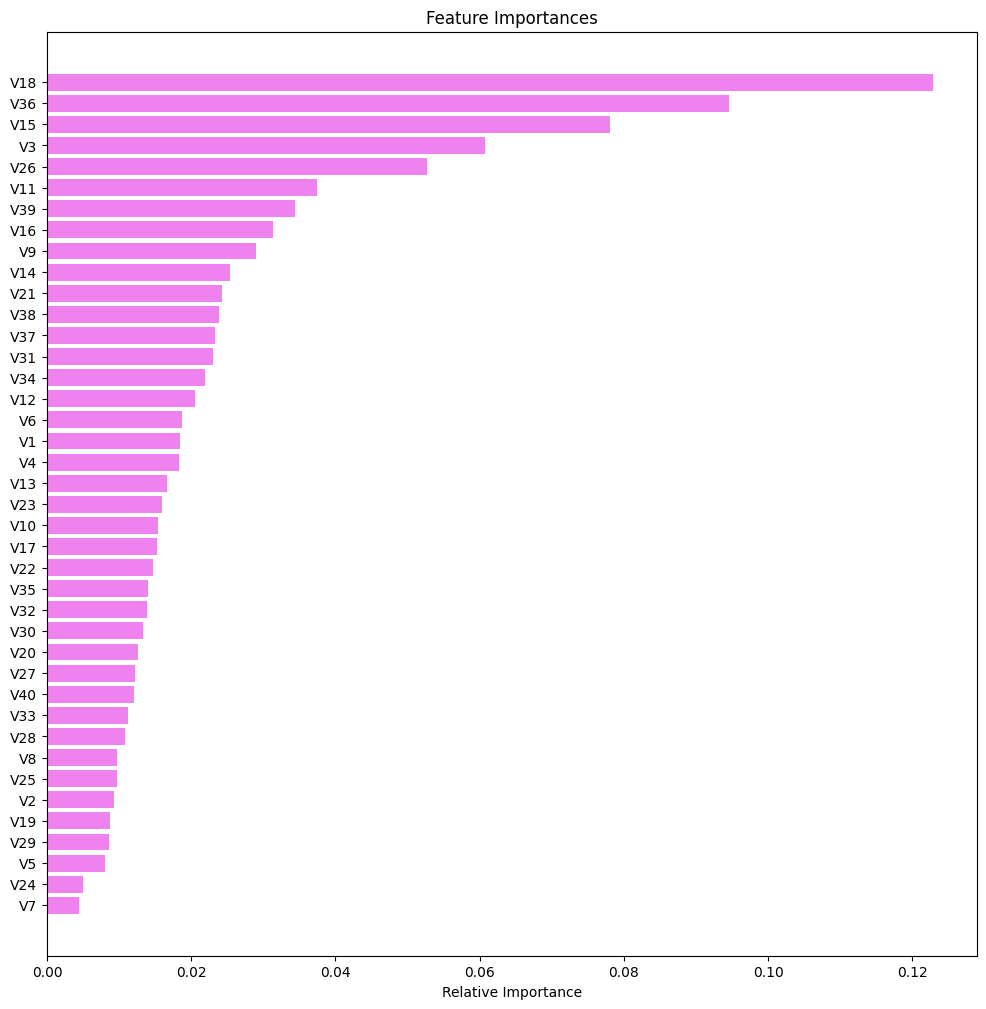

In [ ]:
feature_names = A_test.columns
importances = GBM_tuned_undersampled.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features predicting failure based on this model include; V18 coming top, v36 coming second, v15 coming third, v3 coming 4th, and v26coming 5th.

## Pipelines to build the final model


In [ ]:
df_pipeline = df_main_test.copy( )

In [ ]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
imputer  = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=5))])

# creating a list of categorical variables
features_missing_data = ["V1", "V2"]




In [ ]:

# Define a function for undersampling after pre-processing
def perform_undersampling(X_processed, y_train):  # Ensure y_train is included
    X_resampled, y_resampled = rus.fit_resample(X_processed, y_train)
    return X_resampled, y_resampled

# Wrap the undersampling function in a FunctionTransformer
under_sample_transformer = FunctionTransformer(perform_undersampling, validate=False)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("imputer", imputer,features_missing_data,)
    ],
    remainder="passthrough",
)

In [ ]:
# Creating undersampling pipeline
undersampler = RandomUnderSampler()
undersampling_pipeline = Pipeline([
    ('undersampling', undersampler),
])

In [ ]:
# Separating target variable and other variables
X =  df_pipeline .drop(columns="Target")
Y =  df_pipeline ["Target"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(4000, 40) (1000, 40)


In [ ]:
# Creating new pipeline with best parameters
final_model1 = Pipeline(steps=[
    ("pre", preprocessor),
("under_sample", under_sample_transformer),
    (
        "GBM",
        GradientBoostingClassifier(
            max_features=0.67,
            random_state=1,
            learning_rate=0.15,
            n_estimators=87,
            subsample=0.2,
        ),
    ),
])
# Fit the model on training data
final_model1.fit(X_train, y_train)

In [ ]:
# Creating new pipeline with best parameters
final_model = Pipeline(steps=[
    ("pre", preprocessor),

    (
        "GBM",
        GradientBoostingClassifier(
            max_features=0.67,
            random_state=1,
            learning_rate=0.15,
            n_estimators=87,
            subsample=0.2,
        ),
    ),
])
# Fit the model on training data
final_model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['V1', 'V2'])])),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.15,
                                            max_features=0.67, n_estimators=87,
                                            random_state=1, subsample=0.2))])

In [ ]:
# Let's check the performance on test set
final_model_CHECK = model_performance_classification_sklearn(final_model, X_test, y_test)
final_model_CHECK

Accuracy  Recall  Precision    F1
0     0.964   0.625      0.700 0.660

# Business Insights and Conclusions

- The most important features predicting failure based on this model include; V18 coming top, v36 coming second, v15 coming third, v3 coming 4th, and v26 coming 5th.
- v15 and v18 are strongly correlated, when v15 increases above -5 and v18 drops below 0, chances of failure increase.
- Infact v18 dropping below 0 happens to be the strongest predictor of machine failure, as observed during EDA in charts where they correlate with other features and after building the model.
- When v15 increase above -5, an immediate maintenance work should be done as failure could be imminent.
- Failure may be immininent if V3 falls below 5 especially this happening whenwhen v15 or V7 are above 0.

- Failure may occur if V36 falls below 5 and v18 or V26 is less than 0.


***

-